In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv(r'C:\Users\14807\OneDrive\Spreadsheets\Data Science Capstone\AI_ML_Biotech\Data Collection\Final Data Merging after Collection\merged_alzheimers_data.csv')
# View basic information
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Display first few rows
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69728 entries, 0 to 69727
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DATE ADDED TO CATALOG       69728 non-null  object 
 1   PUBMEDID                    69728 non-null  int64  
 2   FIRST AUTHOR                69728 non-null  object 
 3   DATE                        69728 non-null  object 
 4   JOURNAL                     69728 non-null  object 
 5   LINK                        69728 non-null  object 
 6   STUDY                       69728 non-null  object 
 7   DISEASE/TRAIT               69728 non-null  object 
 8   INITIAL SAMPLE SIZE         69728 non-null  object 
 9   REPLICATION SAMPLE SIZE     69728 non-null  object 
 10  REGION                      69728 non-null  object 
 11  CHR_ID                      69728 non-null  object 
 12  CHR_POS                     69728 non-null  object 
 13  REPORTED GENE(S)            697

# Alzheimers Exploratory Data Anlaysis

In [7]:
# Filter for Alzheimer's related entries
alzheimers_df = df[df['DISEASE/TRAIT'].str.contains('Alzheimer', case=False, na=False)]
print(f"Number of Alzheimer's related entries: {len(alzheimers_df)}")

Number of Alzheimer's related entries: 7279


In [8]:
# Count of unique genes
unique_genes = df['MAPPED_GENE'].nunique()
print(f"Number of unique mapped genes: {unique_genes}")

# Top genes by frequency
top_genes = df['MAPPED_GENE'].value_counts().head(10)
print("Top 10 most frequent genes:")
print(top_genes)

Number of unique mapped genes: 3027
Top 10 most frequent genes:
MAPPED_GENE
Unknown            62356
APOE                 274
NECTIN2              106
TOMM40                97
APOC1 - APOC1P1       76
KRAS - RNU4-67P       53
BCAM - NECTIN2        46
APP                   44
CEACAM16-AS1          42
CLU                   40
Name: count, dtype: int64


In [17]:
import numpy as np
import pandas as pd

numeric_columns = df.select_dtypes(include=[np.number]).columns
inf_found = False

for col in numeric_columns:
    inf_count = np.isinf(df[col]).sum()
    if inf_count > 0:
        print(f"Column '{col}' has {inf_count} infinite values")
        inf_found = True

if not inf_found:
    print("No infinite values found in any numeric column.")

No infinite values found in any numeric column.


In [24]:
import warnings

# Define a function to match the specific warning
def seaborn_inf_na_warning(message, category, filename, lineno, file=None, line=None):
    return (category == FutureWarning and 
            "use_inf_as_na option is deprecated" in str(message) and 
            "seaborn" in filename)

# Apply the filter
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn", message="use_inf_as_na option is deprecated")

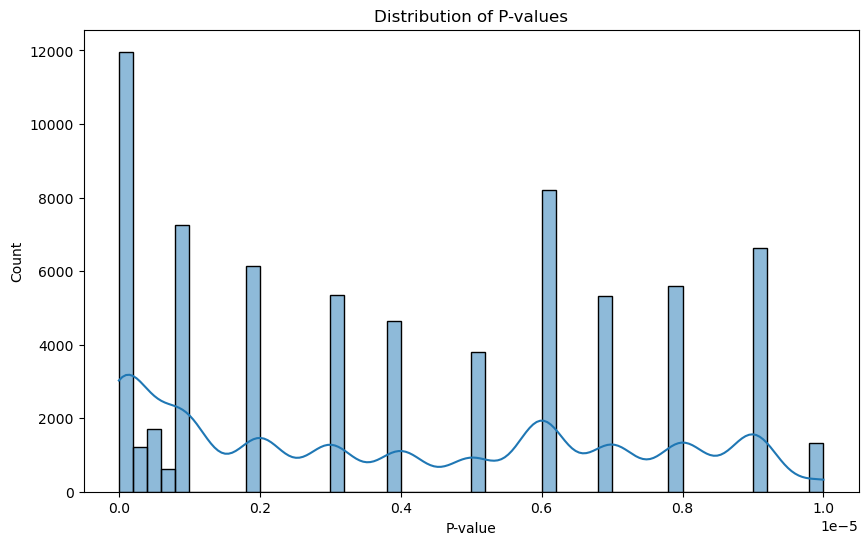

In [25]:

# Distribution of p-values
plt.figure(figsize=(10, 6))
sns.histplot(df['P-VALUE'], bins=50, kde=True)
plt.title('Distribution of P-values')
plt.xlabel('P-value')
plt.show()

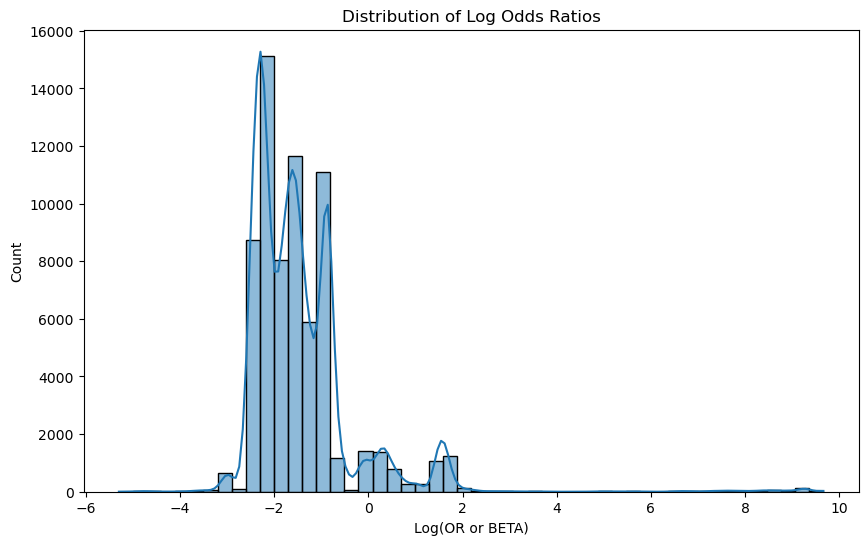

In [23]:

# Distribution of odds ratios (log scale for better visualization)
plt.figure(figsize=(10, 6))
sns.histplot(np.log(df['OR or BETA']), bins=50, kde=True)
plt.title('Distribution of Log Odds Ratios')
plt.xlabel('Log(OR or BETA)')
plt.show()

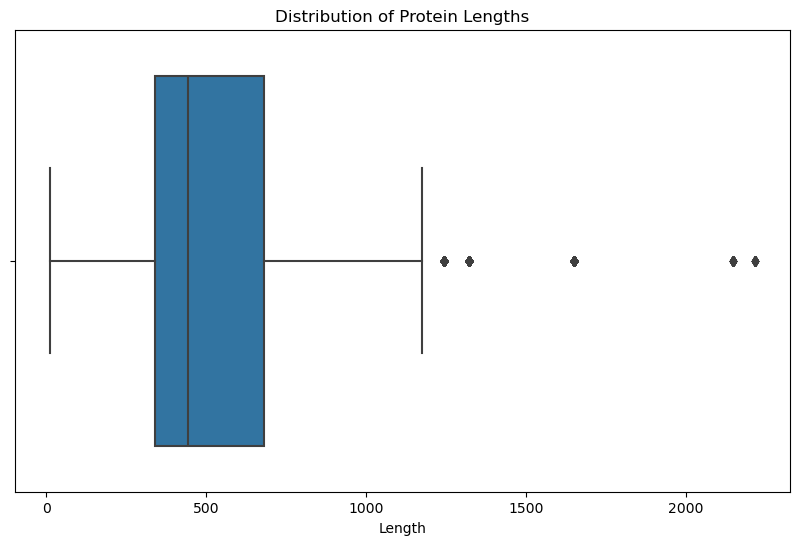

In [26]:
# Remove entries with Length == -1
valid_length_df = df[df['Length'] != -1]

plt.figure(figsize=(10, 6))
sns.boxplot(x='Length', data=valid_length_df)
plt.title('Distribution of Protein Lengths')
plt.show()

In [27]:
# Top genes associated with Alzheimer's
alzheimers_genes = alzheimers_df['MAPPED_GENE'].value_counts().head(10)
print("Top 10 genes associated with Alzheimer's:")
print(alzheimers_genes)

Top 10 genes associated with Alzheimer's:
MAPPED_GENE
Unknown           6026
NECTIN2             90
APOE                54
BCAM - NECTIN2      46
APP                 44
CEACAM16-AS1        42
TOMM40              42
CLU                 40
BIN1 - NIFKP9       32
ABCA7               28
Name: count, dtype: int64


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv(r'C:\Users\14807\OneDrive\Spreadsheets\Data Science Capstone\AI_ML_Biotech\Data Collection\Final Data Merging after Collection\merged_alzheimers_data.csv')  # Replace with your actual file name if different

print("Data loaded successfully. Shape:", df.shape)

Data loaded successfully. Shape: (69728, 48)


In [6]:
# Filter for Alzheimer's related entries
alzheimers_df = df[df['DISEASE/TRAIT'].str.contains('Alzheimer', case=False, na=False)]
print(f"Number of Alzheimer's related entries: {len(alzheimers_df)}")

Number of Alzheimer's related entries: 7279


In [7]:
# Function to analyze a specific gene
def analyze_gene(gene):
    gene_data = alzheimers_df[alzheimers_df['MAPPED_GENE'] == gene]
    print(f"\nAnalysis for gene: {gene}")
    print(f"Number of entries: {len(gene_data)}")
    print(f"Average p-value: {gene_data['P-VALUE'].mean():.2e}")
    print(f"Median p-value: {gene_data['P-VALUE'].median():.2e}")
    print(f"Average odds ratio: {gene_data['OR or BETA'].mean():.2f}")
    print(f"Number of unique SNPs: {gene_data['SNPS'].nunique()}")

# Analyze top known genes
top_genes = ['NECTIN2', 'APOE', 'APP', 'TOMM40', 'CLU', 'ABCA7']
for gene in top_genes:
    analyze_gene(gene)


Analysis for gene: NECTIN2
Number of entries: 90
Average p-value: 2.82e-08
Median p-value: 1.00e-10
Average odds ratio: 3.36
Number of unique SNPs: 36

Analysis for gene: APOE
Number of entries: 54
Average p-value: 1.50e-07
Median p-value: 2.00e-18
Average odds ratio: 2.35
Number of unique SNPs: 4

Analysis for gene: APP
Number of entries: 44
Average p-value: 1.00e-07
Median p-value: 1.00e-07
Average odds ratio: 0.05
Number of unique SNPs: 1

Analysis for gene: TOMM40
Number of entries: 42
Average p-value: 2.53e-07
Median p-value: 7.00e-09
Average odds ratio: 3.84
Number of unique SNPs: 14

Analysis for gene: CLU
Number of entries: 40
Average p-value: 1.42e-07
Median p-value: 2.85e-08
Average odds ratio: 2.66
Number of unique SNPs: 5

Analysis for gene: ABCA7
Number of entries: 28
Average p-value: 2.09e-07
Median p-value: 3.00e-08
Average odds ratio: 2.64
Number of unique SNPs: 5


In [9]:
import warnings

# Define a function to match the specific warning
def seaborn_inf_na_warning(message, category, filename, lineno, file=None, line=None):
    return (category == FutureWarning and 
            "use_inf_as_na option is deprecated" in str(message) and 
            "seaborn" in filename)

# Apply the filter
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn", message="use_inf_as_na option is deprecated")

C:\Users\14807\AppData\Local\Temp\ipykernel_11632\2066244070.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(gene_data['P-VALUE'], label=gene)


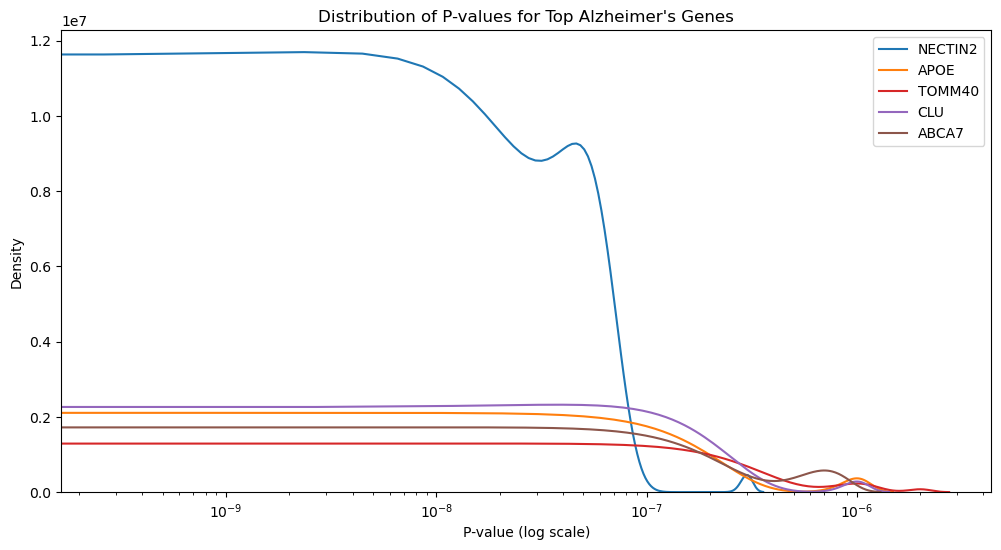

In [10]:
plt.figure(figsize=(12, 6))
for gene in top_genes:
    gene_data = alzheimers_df[alzheimers_df['MAPPED_GENE'] == gene]
    sns.kdeplot(gene_data['P-VALUE'], label=gene)
plt.xscale('log')
plt.xlabel('P-value (log scale)')
plt.ylabel('Density')
plt.title('Distribution of P-values for Top Alzheimer\'s Genes')
plt.legend()
plt.show()

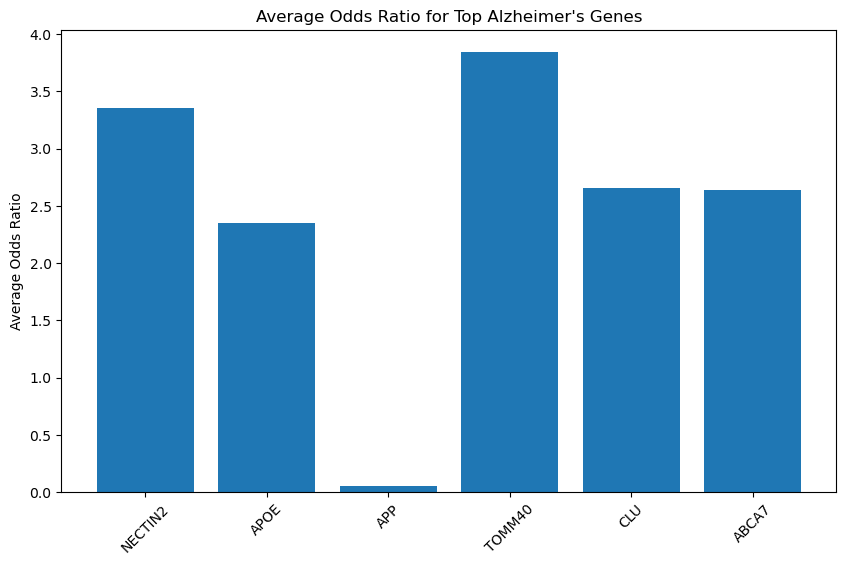

In [11]:
odds_ratios = [alzheimers_df[alzheimers_df['MAPPED_GENE'] == gene]['OR or BETA'].mean() for gene in top_genes]
plt.figure(figsize=(10, 6))
plt.bar(top_genes, odds_ratios)
plt.ylabel('Average Odds Ratio')
plt.title('Average Odds Ratio for Top Alzheimer\'s Genes')
plt.xticks(rotation=45)
plt.show()

In [12]:
unknown_data = alzheimers_df[alzheimers_df['MAPPED_GENE'] == 'Unknown']
print("\nAnalysis of 'Unknown' gene entries:")
print(f"Number of entries: {len(unknown_data)}")
print(f"Average p-value: {unknown_data['P-VALUE'].mean():.2e}")
print(f"Median p-value: {unknown_data['P-VALUE'].median():.2e}")
print(f"Average odds ratio: {unknown_data['OR or BETA'].mean():.2f}")
print(f"Number of unique SNPs: {unknown_data['SNPS'].nunique()}")


Analysis of 'Unknown' gene entries:
Number of entries: 6026
Average p-value: 2.88e-06
Median p-value: 3.00e-06
Average odds ratio: 0.18
Number of unique SNPs: 12


# Unknown Genes

SNPs in Unknown gene entries:
SNPS
chr2:1234674      524
chr9:18907769     524
chr3:148634910    524
chr4:184338069    524
chr7:130370267    524
chr15:58532291    524
chr15:63672925    524
chr16:78989116    524
rs24449894        524
chr2:173336636    524
chr7:24947024     524
chr6:154705966    262
Name: count, dtype: int64


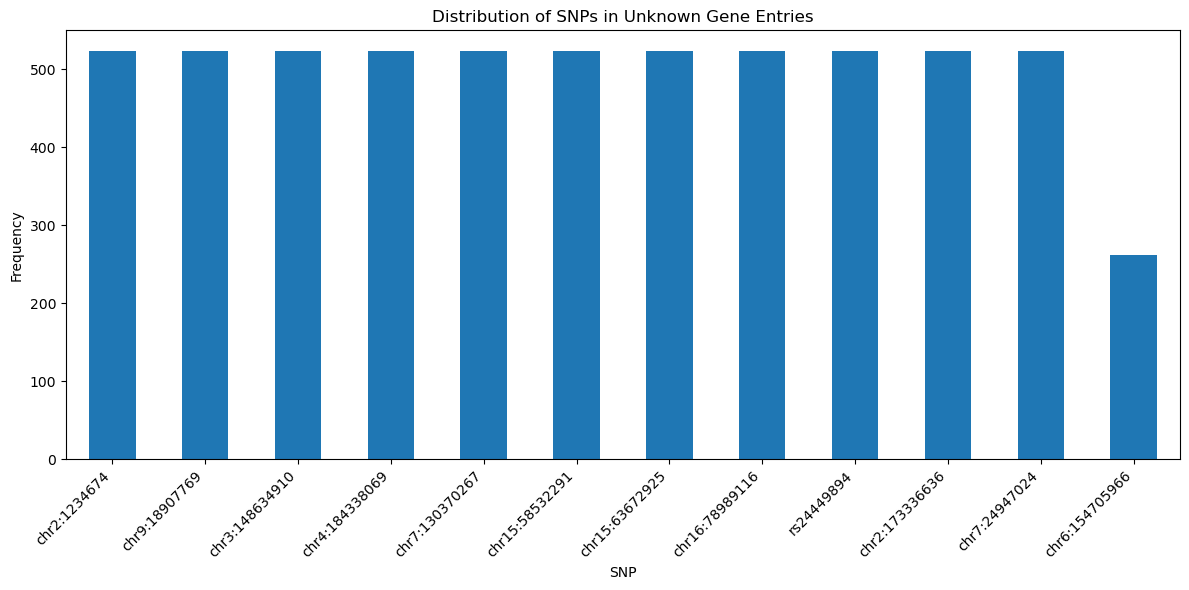

In [13]:
unknown_snps = unknown_data['SNPS'].value_counts()
print("SNPs in Unknown gene entries:")
print(unknown_snps)

# Visualize the distribution of these SNPs
plt.figure(figsize=(12, 6))
unknown_snps.plot(kind='bar')
plt.title('Distribution of SNPs in Unknown Gene Entries')
plt.xlabel('SNP')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [14]:
for snp in unknown_snps.index:
    snp_data = unknown_data[unknown_data['SNPS'] == snp]
    print(f"\nAnalysis for SNP: {snp}")
    print(f"Number of entries: {len(snp_data)}")
    print(f"Average p-value: {snp_data['P-VALUE'].mean():.2e}")
    print(f"Median p-value: {snp_data['P-VALUE'].median():.2e}")
    print(f"Average odds ratio: {snp_data['OR or BETA'].mean():.2f}")
    print(f"Chromosomal position: {snp_data['CHR_ID'].mode()[0]}:{snp_data['CHR_POS'].mode()[0]}")


Analysis for SNP: chr2:1234674
Number of entries: 524
Average p-value: 4.00e-06
Median p-value: 4.00e-06
Average odds ratio: 0.12
Chromosomal position: Unknown:Unknown

Analysis for SNP: chr9:18907769
Number of entries: 524
Average p-value: 3.00e-06
Median p-value: 3.00e-06
Average odds ratio: 0.12
Chromosomal position: Unknown:Unknown

Analysis for SNP: chr3:148634910
Number of entries: 524
Average p-value: 3.00e-06
Median p-value: 3.00e-06
Average odds ratio: 0.12
Chromosomal position: Unknown:Unknown

Analysis for SNP: chr4:184338069
Number of entries: 524
Average p-value: 1.00e-05
Median p-value: 1.00e-05
Average odds ratio: 0.12
Chromosomal position: Unknown:Unknown

Analysis for SNP: chr7:130370267
Number of entries: 524
Average p-value: 9.00e-09
Median p-value: 9.00e-09
Average odds ratio: 0.15
Chromosomal position: Unknown:Unknown

Analysis for SNP: chr15:58532291
Number of entries: 524
Average p-value: 5.00e-06
Median p-value: 5.00e-06
Average odds ratio: 0.12
Chromosomal pos


Top 10 SNPs in known gene entries:
SNPS
rs4817090     44
rs429358      26
rs28834970    16
rs11218343    16
rs9331896     16
rs7412        16
rs442495      12
rs4236673     12
rs10792832    12
rs6733839     12
Name: count, dtype: int64


<Figure size 1200x600 with 0 Axes>

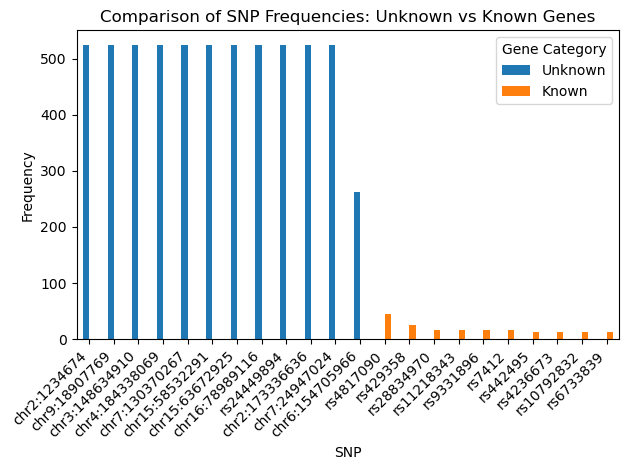

In [15]:
known_snps = alzheimers_df[alzheimers_df['MAPPED_GENE'] != 'Unknown']['SNPS'].value_counts().head(10)
print("\nTop 10 SNPs in known gene entries:")
print(known_snps)

# Visualize the comparison
plt.figure(figsize=(12, 6))
pd.concat([unknown_snps, known_snps], axis=1, keys=['Unknown', 'Known']).plot(kind='bar')
plt.title('Comparison of SNP Frequencies: Unknown vs Known Genes')
plt.xlabel('SNP')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gene Category')
plt.tight_layout()
plt.show()

In [28]:
for snp in unknown_snps.index:
    known_entries = alzheimers_df[(alzheimers_df['MAPPED_GENE'] != 'Unknown') & (alzheimers_df['SNPS'] == snp)]
    if not known_entries.empty:
        print(f"\nSNP {snp} also appears in known gene entries:")
        print(known_entries['MAPPED_GENE'].value_counts())

<Figure size 1200x600 with 0 Axes>

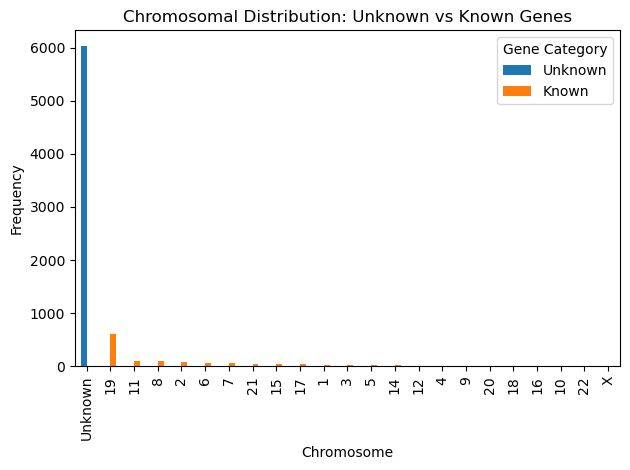

In [20]:
unknown_chr = unknown_data['CHR_ID'].value_counts()
known_chr = alzheimers_df[alzheimers_df['MAPPED_GENE'] != 'Unknown']['CHR_ID'].value_counts()

plt.figure(figsize=(12, 6))
pd.concat([unknown_chr, known_chr], axis=1, keys=['Unknown', 'Known']).plot(kind='bar')
plt.title('Chromosomal Distribution: Unknown vs Known Genes')
plt.xlabel('Chromosome')
plt.ylabel('Frequency')
plt.legend(title='Gene Category')
plt.tight_layout()
plt.show()

In [29]:
#This analysis will provide:

#A detailed look at the SNPs associated with unknown gene entries.
#Comparison with SNPs in known gene entries.
#Information on whether any unknown SNPs also appear in known gene entries.
#The chromosomal distribution of SNPs in unknown vs. known gene entries


Analysis for SNP: rs4817090
Associated genes: APP
Average p-value: 1.00e-07
Average odds ratio: 0.05
Chromosomal position: 21:26161943

Analysis for SNP: rs429358
Associated genes: APOE
Average p-value: 3.08e-07
Average odds ratio: 0.53
Chromosomal position: 19:44908684

Analysis for SNP: rs28834970
Associated genes: PTK2B
Average p-value: 1.80e-06
Average odds ratio: 2.23
Chromosomal position: 8:27337604

Analysis for SNP: rs11218343
Associated genes: SORL1
Average p-value: 1.25e-06
Average odds ratio: 2.23
Chromosomal position: 11:121564878

Analysis for SNP: rs9331896
Associated genes: CLU
Average p-value: 3.15e-07
Average odds ratio: 2.62
Chromosomal position: 8:27610169

Analysis for SNP: rs7412
Associated genes: APOE
Average p-value: 2.25e-62
Average odds ratio: 5.62
Chromosomal position: 19:44908822

Analysis for SNP: rs442495
Associated genes: ADAM10
Average p-value: 1.00e-07
Average odds ratio: 3.76
Chromosomal position: 15:58730416

Analysis for SNP: rs4236673
Associated gen

C:\Users\14807\AppData\Local\Temp\ipykernel_11632\2869234021.py:26: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(snp_data['P-VALUE'], label=snp)


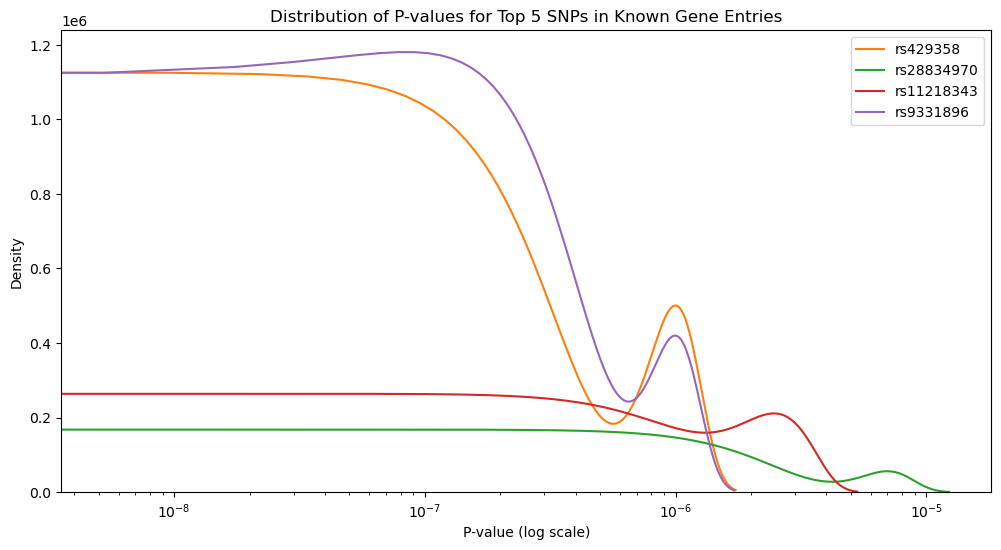

In [30]:
# Function to get gene information for a SNP
def get_gene_info(snp):
    snp_data = alzheimers_df[alzheimers_df['SNPS'] == snp]
    genes = snp_data['MAPPED_GENE'].unique()
    return ', '.join(genes)

# Analyze top SNPs
for snp in known_snps.index:
    print(f"\nAnalysis for SNP: {snp}")
    print(f"Associated genes: {get_gene_info(snp)}")
    snp_data = alzheimers_df[alzheimers_df['SNPS'] == snp]
    print(f"Average p-value: {snp_data['P-VALUE'].mean():.2e}")
    print(f"Average odds ratio: {snp_data['OR or BETA'].mean():.2f}")
    print(f"Chromosomal position: {snp_data['CHR_ID'].mode()[0]}:{snp_data['CHR_POS'].mode()[0]}")

# Check if these SNPs appear in unknown entries
for snp in known_snps.index:
    unknown_entries = unknown_data[unknown_data['SNPS'] == snp]
    if not unknown_entries.empty:
        print(f"\nSNP {snp} also appears in unknown gene entries ({len(unknown_entries)} times)")

# Visualize p-values for top SNPs
plt.figure(figsize=(12, 6))
for snp in known_snps.index[:5]:  # Top 5 SNPs for clarity
    snp_data = alzheimers_df[alzheimers_df['SNPS'] == snp]
    sns.kdeplot(snp_data['P-VALUE'], label=snp)
plt.xscale('log')
plt.xlabel('P-value (log scale)')
plt.ylabel('Density')
plt.title('Distribution of P-values for Top 5 SNPs in Known Gene Entries')
plt.legend()
plt.show()

In [31]:
# This additional analysis will provide:

# Information on which genes are associated with each top SNP.
# The average p-value and odds ratio for each top SNP.
# The chromosomal location of each SNP.
# Whether any of these top SNPs also appear in unknown gene entries.
# A visualization of p-value distributions for the top 5 SNPs.

### Disease and trait analysis

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv(r'C:\Users\14807\OneDrive\Spreadsheets\Data Science Capstone\AI_ML_Biotech\Data Collection\Final Data Merging after Collection\merged_alzheimers_data.csv')  # Replace with your actual file name if different

print("Data loaded successfully. Shape:", df.shape)

Data loaded successfully. Shape: (69728, 48)


Top 10 Disease/Traits:
DISEASE/TRAIT
Cerebrospinal fluid AB1-42 levels                          12172
Cerebrospinal fluid t-tau levels                            7894
Plasma amyloid beta 42 to 40 ratio                          7340
Cerebrospinal P-tau181p levels                              5830
Neuritic plaque                                             4247
Plasma p-tau181 levels                                      3684
Plasma amyloid beta 40 levels                               3670
Plasma amyloid beta 42 levels                               3670
Total PHF-tau (SNP x SNP interaction)                       3168
Plasma amyloid beta 42 to 40 ratio in Alzheimer disease     3144
Name: count, dtype: int64


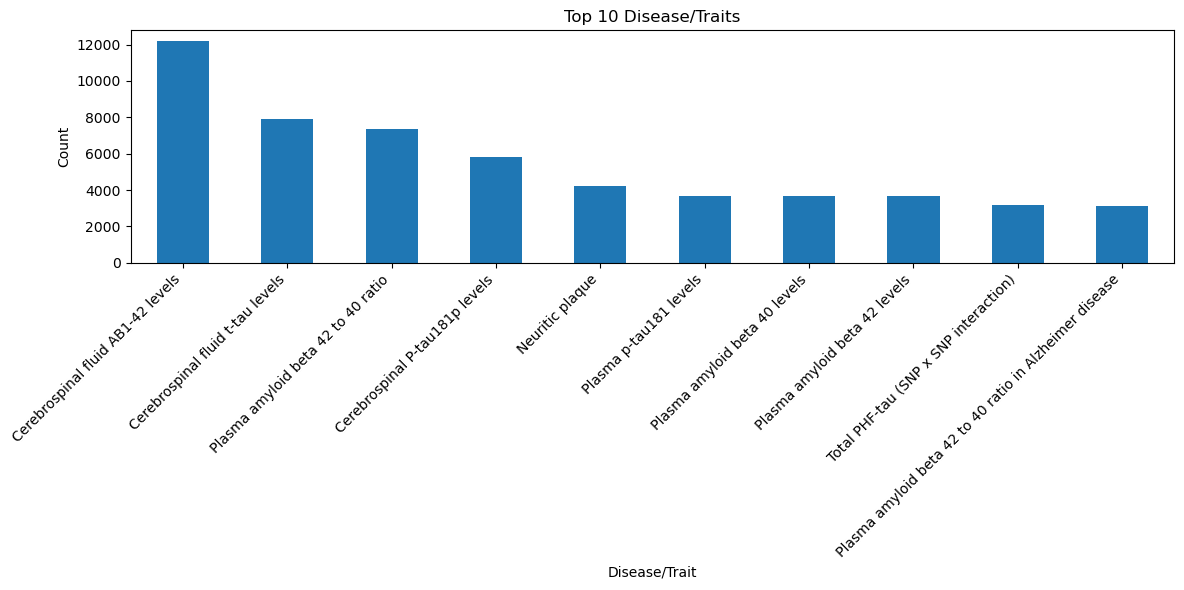

In [4]:
# Count of different disease/traits
trait_counts = df['DISEASE/TRAIT'].value_counts()
print("Top 10 Disease/Traits:")
print(trait_counts.head(10))

# Visualize top diseases/traits
plt.figure(figsize=(12, 6))
trait_counts.head(10).plot(kind='bar')
plt.title('Top 10 Disease/Traits')
plt.xlabel('Disease/Trait')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# The above code will:

# Load your data into a DataFrame named 'df'.
# Calculate the counts of different diseases/traits.
# Print the top 10 diseases/traits.
# Create a bar plot visualizing these top 10 diseases/traits


Analysis for Cerebrospinal fluid AB1-42 levels:
                 SNPS MAPPED_GENE       P-VALUE  OR or BETA
59338        rs769449        APOE  5.000000e-94      0.1010
17595        rs769449        APOE  5.000000e-94      0.1010
17594        rs769449        APOE  5.000000e-94      0.1010
59337        rs769449        APOE  5.000000e-94      0.1010
28961        rs429358        APOE  1.000000e-51      0.8000
11545        rs429358        APOE  1.000000e-51      0.8000
11544        rs429358        APOE  1.000000e-51      0.8000
28962        rs429358        APOE  1.000000e-51      0.8000
17141  chr19:45410002     Unknown  4.000000e-43      0.5695
17142  chr19:45410002     Unknown  4.000000e-43      0.5695


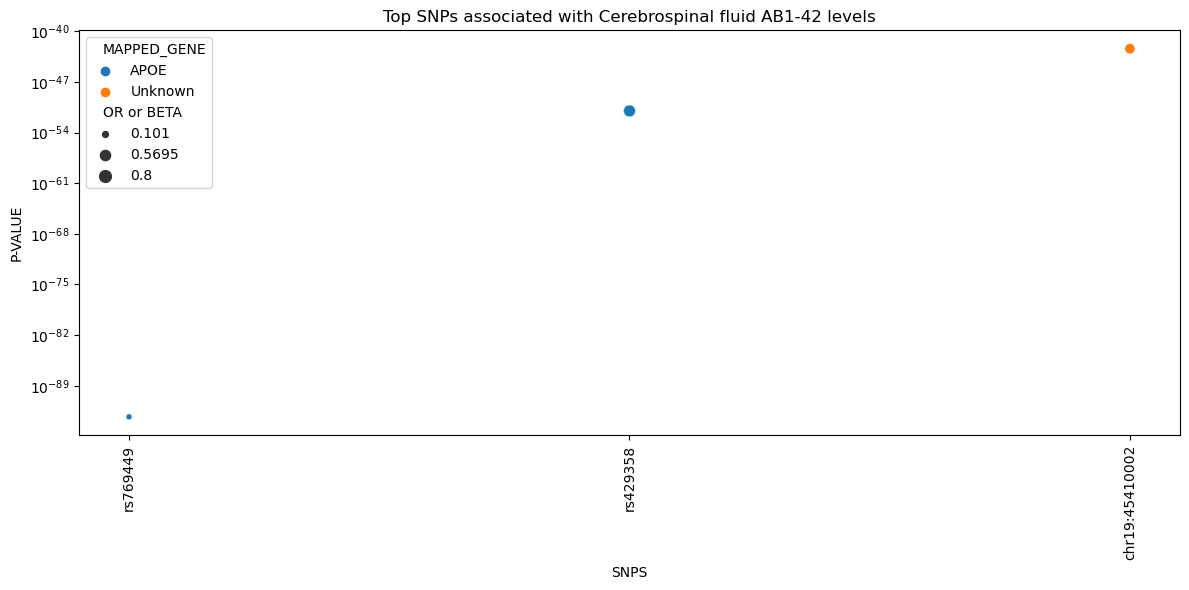


Analysis for Cerebrospinal fluid t-tau levels:
             SNPS    MAPPED_GENE       P-VALUE  OR or BETA
31866    rs769449           APOE  2.000000e-30       0.076
31867    rs769449           APOE  2.000000e-30       0.076
65688    rs769449           APOE  2.000000e-30       0.076
65689    rs769449           APOE  2.000000e-30       0.076
65670    rs429358           APOE  1.000000e-20       0.550
65669    rs429358           APOE  1.000000e-20       0.550
31848    rs429358           APOE  1.000000e-20       0.550
31847    rs429358           APOE  1.000000e-20       0.550
65686  rs60871478  DNAAF5 - SUN1  3.000000e-15       0.044
31864  rs60871478  DNAAF5 - SUN1  3.000000e-15       0.044


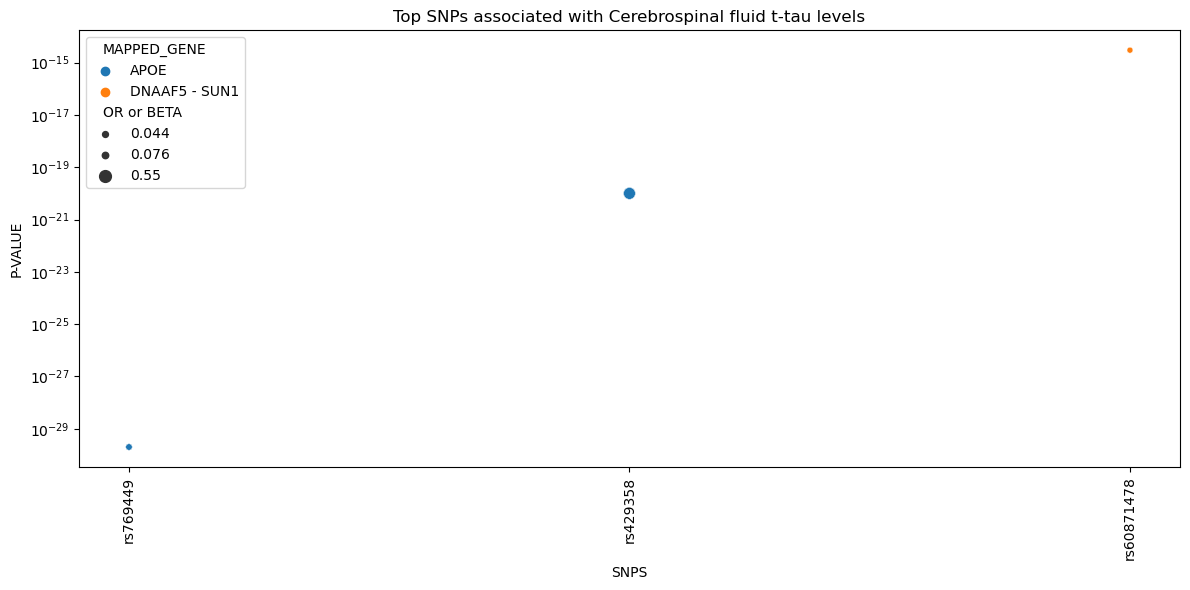


Analysis for Plasma amyloid beta 42 to 40 ratio:
                 SNPS MAPPED_GENE       P-VALUE  OR or BETA
9571         rs429358        APOE  6.000000e-18       0.363
55317        rs429358        APOE  6.000000e-18       0.363
9570         rs429358        APOE  6.000000e-18       0.363
55318        rs429358        APOE  6.000000e-18       0.363
6684   chr16:78989116     Unknown  3.000000e-07       0.116
6776   chr16:78989116     Unknown  3.000000e-07       0.116
6775   chr16:78989116     Unknown  3.000000e-07       0.116
6774   chr16:78989116     Unknown  3.000000e-07       0.116
6773   chr16:78989116     Unknown  3.000000e-07       0.116
6772   chr16:78989116     Unknown  3.000000e-07       0.116


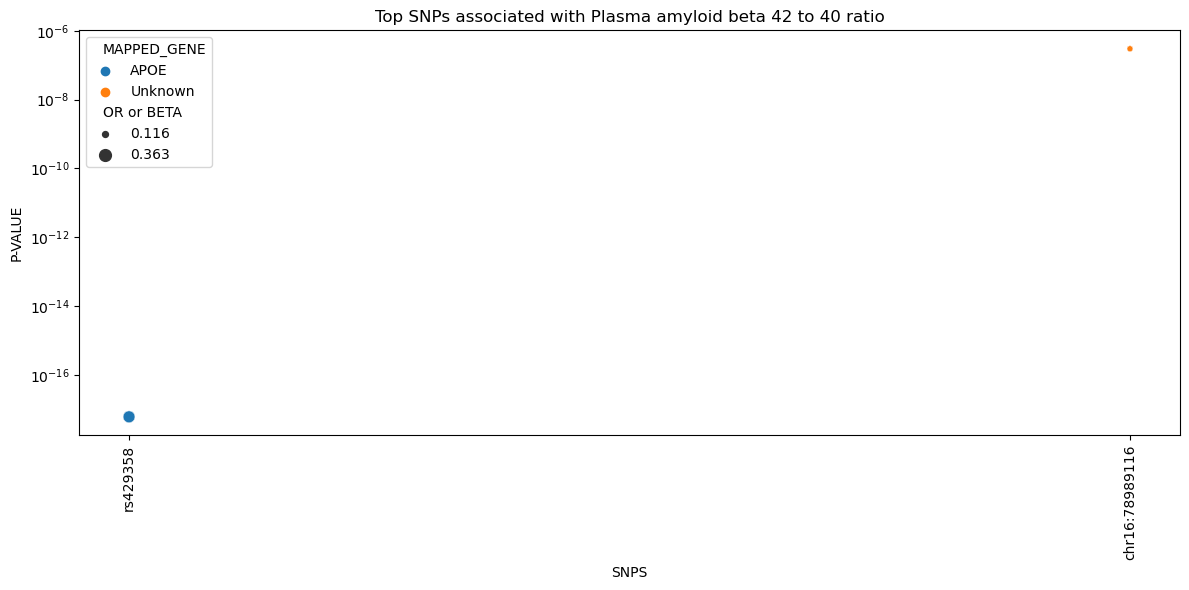


Analysis for Cerebrospinal P-tau181p levels:
              SNPS MAPPED_GENE       P-VALUE  OR or BETA
24143     rs769449        APOE  5.000000e-33       0.079
59717     rs769449        APOE  5.000000e-33       0.079
24142     rs769449        APOE  5.000000e-33       0.079
59718     rs769449        APOE  5.000000e-33       0.079
23862  rs137901696     Unknown  5.000000e-10       0.050
24035  rs137901696     Unknown  5.000000e-10       0.050
24036  rs137901696     Unknown  5.000000e-10       0.050
24037  rs137901696     Unknown  5.000000e-10       0.050
24038  rs137901696     Unknown  5.000000e-10       0.050
24039  rs137901696     Unknown  5.000000e-10       0.050


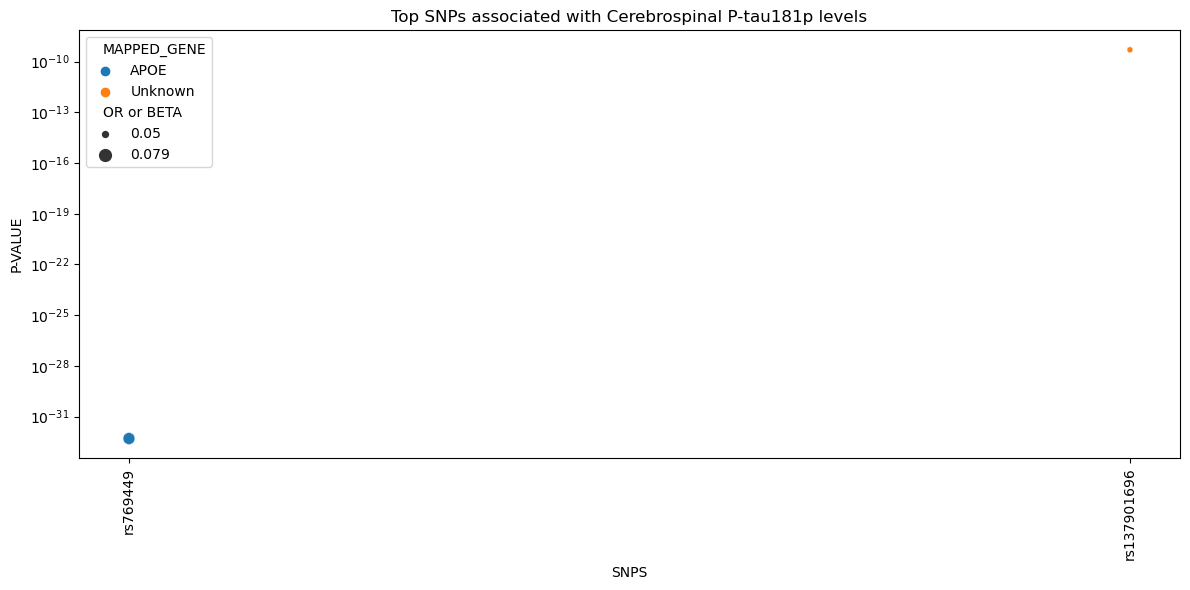


Analysis for Neuritic plaque:
                 SNPS MAPPED_GENE       P-VALUE  OR or BETA
58479          rs6857     NECTIN2  3.000000e-47    0.946700
58216          rs6857     NECTIN2  2.000000e-27    1.293200
59292        rs429358        APOE  9.000000e-25    1.232879
59291        rs429358        APOE  9.000000e-25    1.232879
32145        rs429358        APOE  3.000000e-24    0.416400
32144        rs429358        APOE  3.000000e-24    0.416400
59277        rs429358        APOE  5.000000e-20    1.113172
59276        rs429358        APOE  5.000000e-20    1.113172
56374      rs62341097      GALNT7  6.000000e-09    1.147400
58300  chr21:43678066     Unknown  8.000000e-09    2.108000


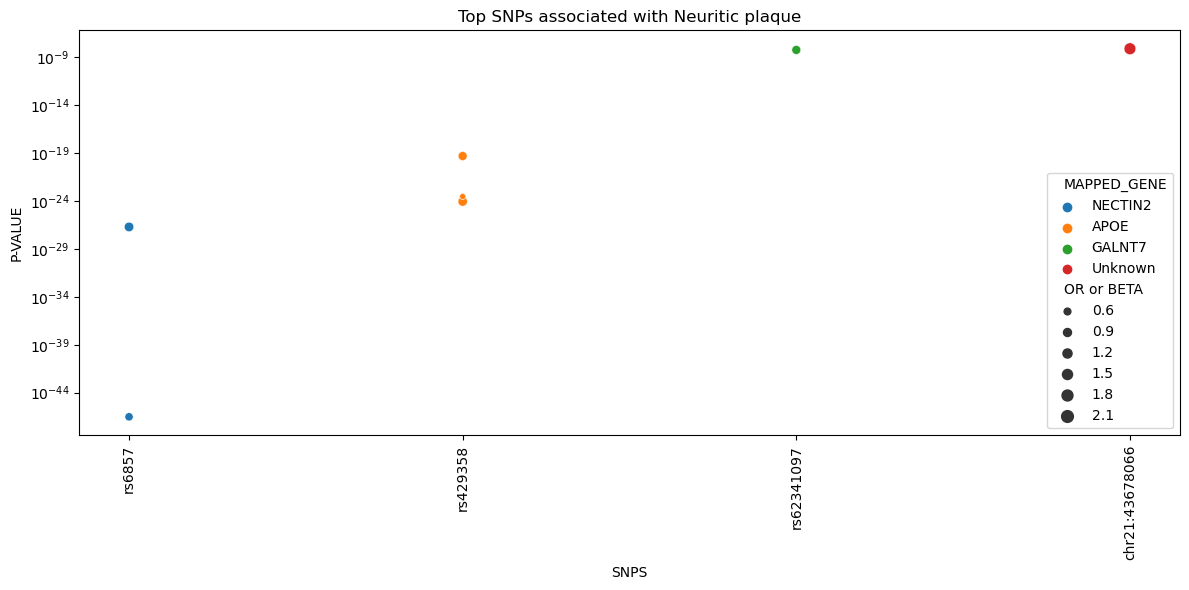


Analysis for Plasma p-tau181 levels:
             SNPS      MAPPED_GENE       P-VALUE  OR or BETA
29561    rs429358             APOE  3.000000e-25       0.281
29560    rs429358             APOE  3.000000e-25       0.281
19135    rs429358             APOE  3.000000e-25       0.281
19136    rs429358             APOE  3.000000e-25       0.281
26463  rs56131196  APOC1 - APOC1P1  4.000000e-22       0.390
19114  rs56131196  APOC1 - APOC1P1  4.000000e-22       0.390
19103    rs769449             APOE  6.000000e-08       3.361
26458    rs769449             APOE  6.000000e-08       3.361
26457    rs769449             APOE  6.000000e-08       3.361
19104    rs769449             APOE  6.000000e-08       3.361


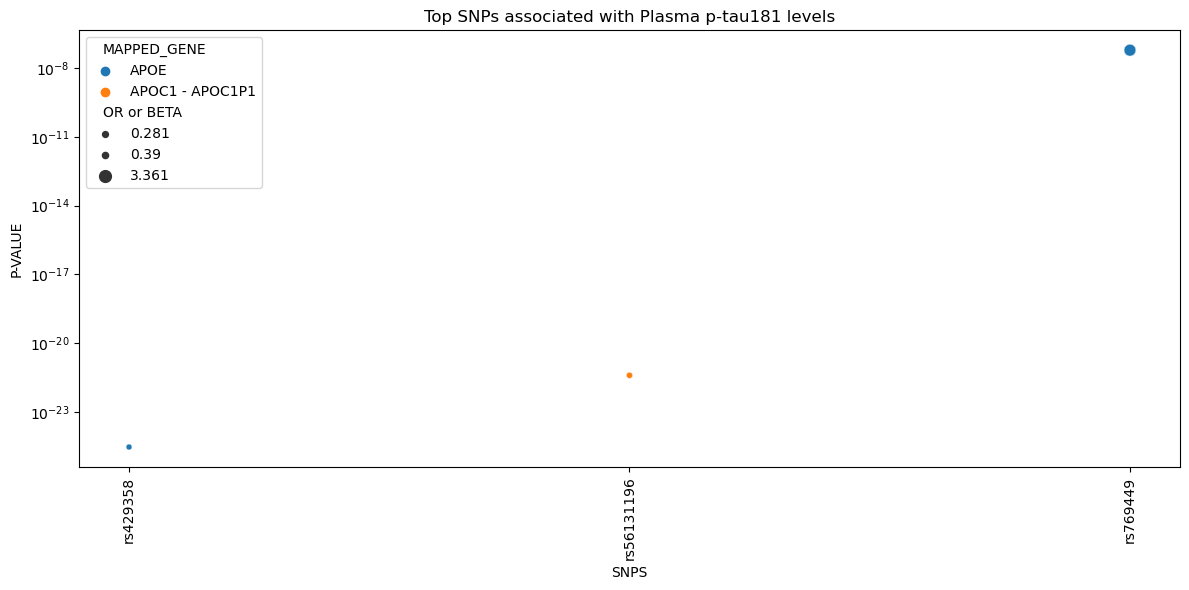

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from collections import Counter

# List of top biomarkers
top_biomarkers = [
    'Cerebrospinal fluid AB1-42 levels',
    'Cerebrospinal fluid t-tau levels',
    'Plasma amyloid beta 42 to 40 ratio',
    'Cerebrospinal P-tau181p levels',
    'Neuritic plaque',
    'Plasma p-tau181 levels'
]

# Function to get top associated SNPs for a trait
def get_top_snps(trait, n=10):
    trait_data = df[df['DISEASE/TRAIT'] == trait].sort_values('P-VALUE')
    return trait_data[['SNPS', 'MAPPED_GENE', 'P-VALUE', 'OR or BETA']].head(n)

# Analyze each biomarker
for biomarker in top_biomarkers:
    print(f"\nAnalysis for {biomarker}:")
    top_snps = get_top_snps(biomarker)
    print(top_snps)
    
    # Visualize top SNPs
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=top_snps, x='SNPS', y='P-VALUE', size='OR or BETA', hue='MAPPED_GENE')
    plt.title(f'Top SNPs associated with {biomarker}')
    plt.xticks(rotation=90)
    plt.yscale('log')
    plt.tight_layout()
    plt.show()

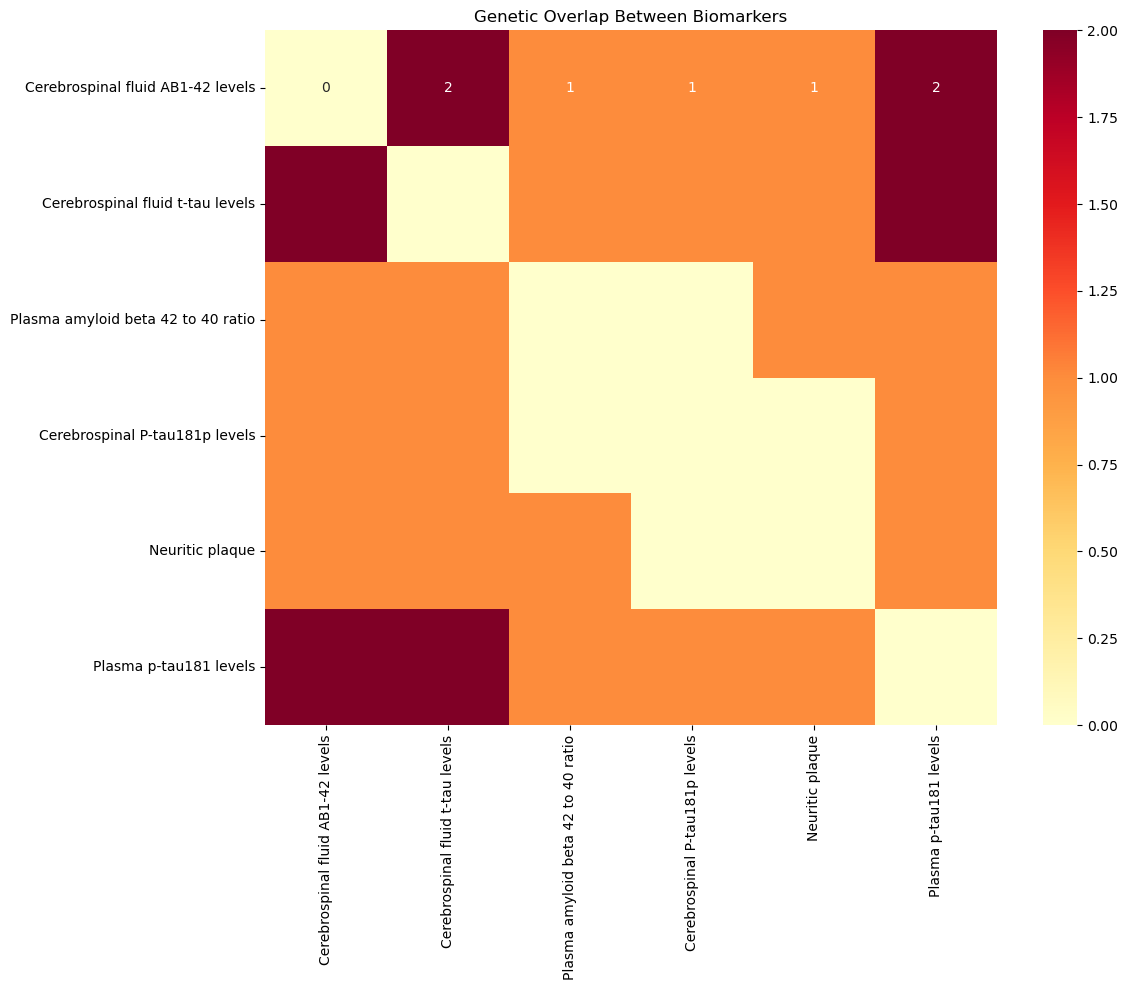

In [8]:
# Compare genetic overlap between biomarkers
overlap_matrix = pd.DataFrame(index=top_biomarkers, columns=top_biomarkers)

for i, biomarker1 in enumerate(top_biomarkers):
    for j, biomarker2 in enumerate(top_biomarkers):
        if i > j:
            snps1 = set(get_top_snps(biomarker1, n=100)['SNPS'])
            snps2 = set(get_top_snps(biomarker2, n=100)['SNPS'])
            overlap = len(snps1.intersection(snps2))
            overlap_matrix.loc[biomarker1, biomarker2] = overlap
            overlap_matrix.loc[biomarker2, biomarker1] = overlap

# Fill NaN values with zeros
overlap_matrix = overlap_matrix.fillna(0)

# Convert to numeric (optional but safe)
overlap_matrix = overlap_matrix.astype(float)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(overlap_matrix, annot=True, cmap='YlOrRd')
plt.title('Genetic Overlap Between Biomarkers')
plt.tight_layout()
plt.show()


In [10]:
import warnings

# Add this at the beginning of your script
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

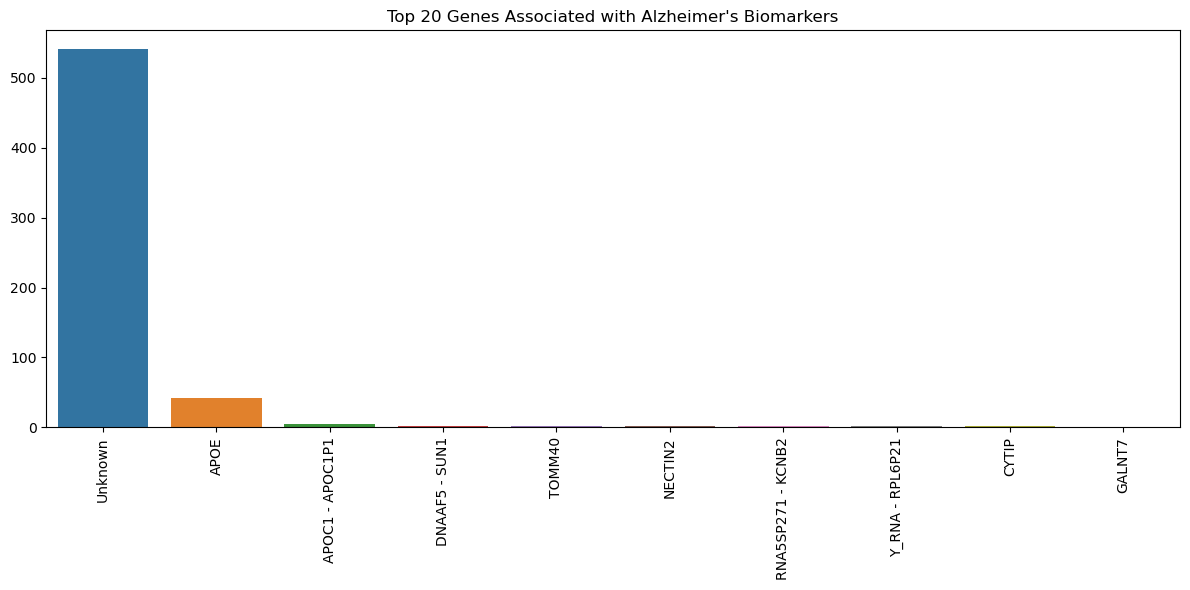

In [11]:
# Analyze pathway enrichment (simplified version)
all_genes = []
for biomarker in top_biomarkers:
    genes = get_top_snps(biomarker, n=100)['MAPPED_GENE'].tolist()
    all_genes.extend(genes)

gene_counts = Counter(all_genes)
top_genes = gene_counts.most_common(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=[gene for gene, count in top_genes], y=[count for gene, count in top_genes])
plt.title('Top 20 Genes Associated with Alzheimer\'s Biomarkers')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [12]:
# This final part identifies and visualizes the most common genes associated with the Alzheimer's biomarkers.
# Each of these code blocks performs a specific analysis:

# SNP analysis for each biomarker
# Genetic overlap between biomarkers
# Top genes associated with Alzheimer's biomarkers

### New genetic targets:

#### NECTIN2
#### GALNT7
#### DNAAF5-SUN1


Analysis for NECTIN2:
Number of associated SNPs: 154
Average p-value: 2.77e-08
Minimum p-value: 1.00e-300
Average effect size (OR or BETA): 2.7763


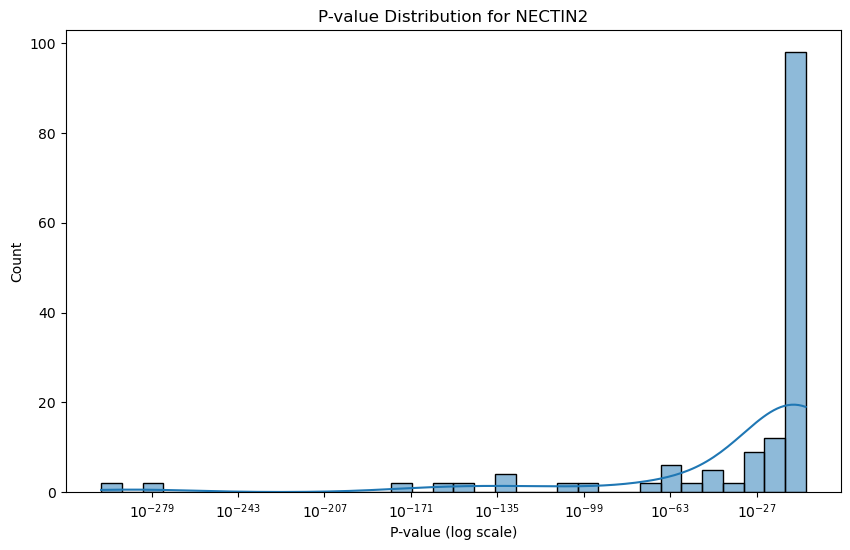


Top 5 associated traits:
DISEASE/TRAIT
Alzheimer's disease or family history of Alzheimer's disease    116
Family history of Alzheimer's disease                            18
Cerebral amyloid deposition (PET imaging)                        10
Plasma amyloid beta 42 levels                                     2
Brain amyloid deposition (PET imaging)                            2
Name: count, dtype: int64

Analysis for GALNT7:
Number of associated SNPs: 3
Average p-value: 2.07e-09
Minimum p-value: 1.00e-10
Average effect size (OR or BETA): 0.6601


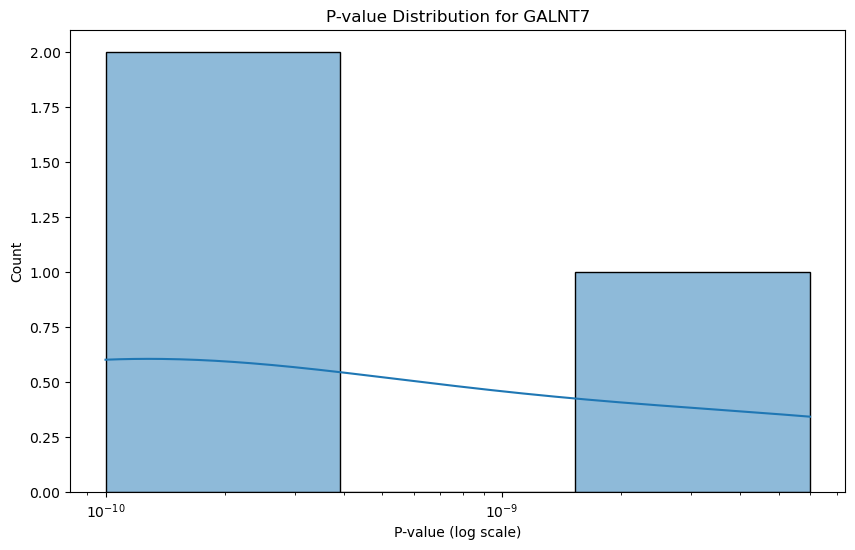


Top 5 associated traits:
DISEASE/TRAIT
Total PHF-tau (SNP x SNP interaction)    2
Neuritic plaque                          1
Name: count, dtype: int64

Analysis for DNAAF5:
Number of associated SNPs: 6
Average p-value: 1.67e-07
Minimum p-value: 3.00e-15
Average effect size (OR or BETA): 0.0393


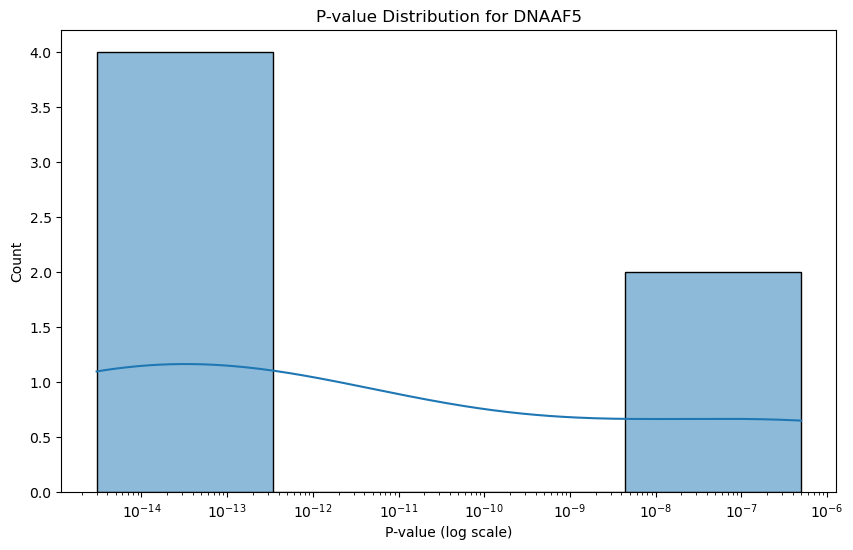


Top 5 associated traits:
DISEASE/TRAIT
Cerebrospinal fluid p-tau levels    2
Cerebrospinal P-tau181p levels      2
Cerebrospinal fluid t-tau levels    2
Name: count, dtype: int64

Analysis for SUN1:
Number of associated SNPs: 6
Average p-value: 1.67e-07
Minimum p-value: 3.00e-15
Average effect size (OR or BETA): 0.0393


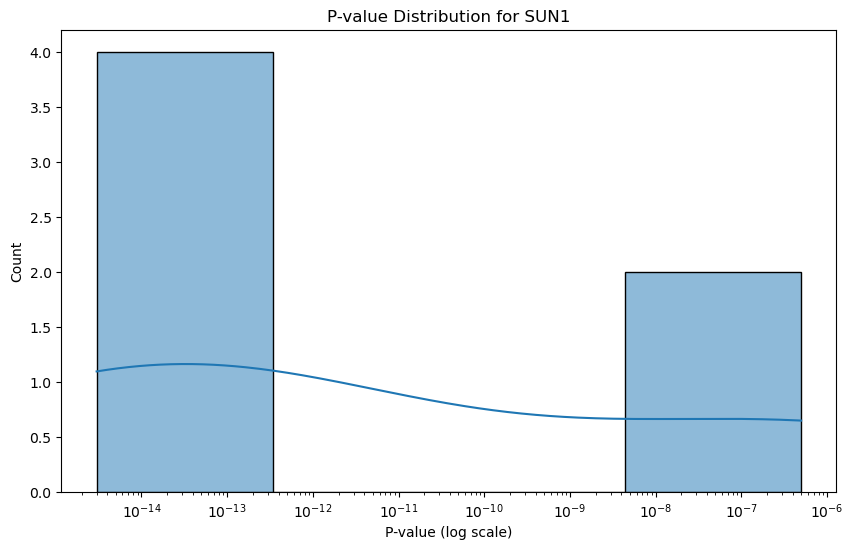


Top 5 associated traits:
DISEASE/TRAIT
Cerebrospinal fluid p-tau levels    2
Cerebrospinal P-tau181p levels      2
Cerebrospinal fluid t-tau levels    2
Name: count, dtype: int64

Comparison of new target genes:
      Gene  SNP Count  Mean P-value    Min P-value  Mean Effect Size
0  NECTIN2        154  2.770494e-08  1.000000e-300          2.776308
1   GALNT7          3  2.066667e-09   1.000000e-10          0.660067
2   DNAAF5          6  1.666667e-07   3.000000e-15          0.039333
3     SUN1          6  1.666667e-07   3.000000e-15          0.039333


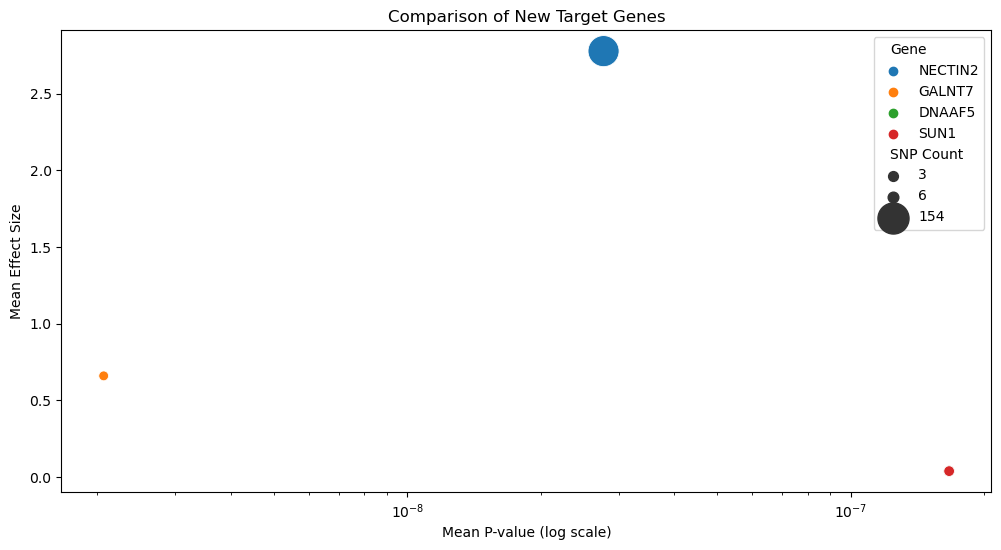

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of new target genes
new_targets = ['NECTIN2', 'GALNT7', 'DNAAF5', 'SUN1']

def analyze_gene(gene):
    gene_data = df[df['MAPPED_GENE'].str.contains(gene, na=False)]
    print(f"\nAnalysis for {gene}:")
    print(f"Number of associated SNPs: {len(gene_data)}")
    print(f"Average p-value: {gene_data['P-VALUE'].mean():.2e}")
    print(f"Minimum p-value: {gene_data['P-VALUE'].min():.2e}")
    print(f"Average effect size (OR or BETA): {gene_data['OR or BETA'].mean():.4f}")
    
    # Plot p-value distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(gene_data['P-VALUE'], kde=True, log_scale=True)
    plt.title(f'P-value Distribution for {gene}')
    plt.xlabel('P-value (log scale)')
    plt.ylabel('Count')
    plt.show()
    
    # Top associated traits
    top_traits = gene_data['DISEASE/TRAIT'].value_counts().head(5)
    print("\nTop 5 associated traits:")
    print(top_traits)

for gene in new_targets:
    analyze_gene(gene)

# Compare these genes
comparison_data = []
for gene in new_targets:
    gene_data = df[df['MAPPED_GENE'].str.contains(gene, na=False)]
    comparison_data.append({
        'Gene': gene,
        'SNP Count': len(gene_data),
        'Mean P-value': gene_data['P-VALUE'].mean(),
        'Min P-value': gene_data['P-VALUE'].min(),
        'Mean Effect Size': gene_data['OR or BETA'].mean()
    })

comparison_df = pd.DataFrame(comparison_data)
print("\nComparison of new target genes:")
print(comparison_df)

# Visualize comparison
plt.figure(figsize=(12, 6))
sns.scatterplot(data=comparison_df, x='Mean P-value', y='Mean Effect Size', 
                size='SNP Count', hue='Gene', sizes=(50, 500))
plt.xscale('log')
plt.title('Comparison of New Target Genes')
plt.xlabel('Mean P-value (log scale)')
plt.ylabel('Mean Effect Size')
plt.show()

### Unknown genes


Analysis of Unknown Genes:
Number of unknown gene entries: 62356
Average p-value: 4.40e-06
Minimum p-value: 4.00e-43

Top 10 SNPs with unknown genes:
                 SNPS   CHR_ID  CHR_POS       P-VALUE  OR or BETA  \
38189  chr19:45410002  Unknown  Unknown  4.000000e-43      0.5695   
17312  chr19:45410002  Unknown  Unknown  4.000000e-43      0.5695   
17313  chr19:45410002  Unknown  Unknown  4.000000e-43      0.5695   
17314  chr19:45410002  Unknown  Unknown  4.000000e-43      0.5695   
17315  chr19:45410002  Unknown  Unknown  4.000000e-43      0.5695   
17316  chr19:45410002  Unknown  Unknown  4.000000e-43      0.5695   
17317  chr19:45410002  Unknown  Unknown  4.000000e-43      0.5695   
38449  chr19:45410002  Unknown  Unknown  4.000000e-43      0.5695   
38448  chr19:45410002  Unknown  Unknown  4.000000e-43      0.5695   
38447  chr19:45410002  Unknown  Unknown  4.000000e-43      0.5695   

                           DISEASE/TRAIT  
38189  Cerebrospinal fluid AB1-42 levels  
173

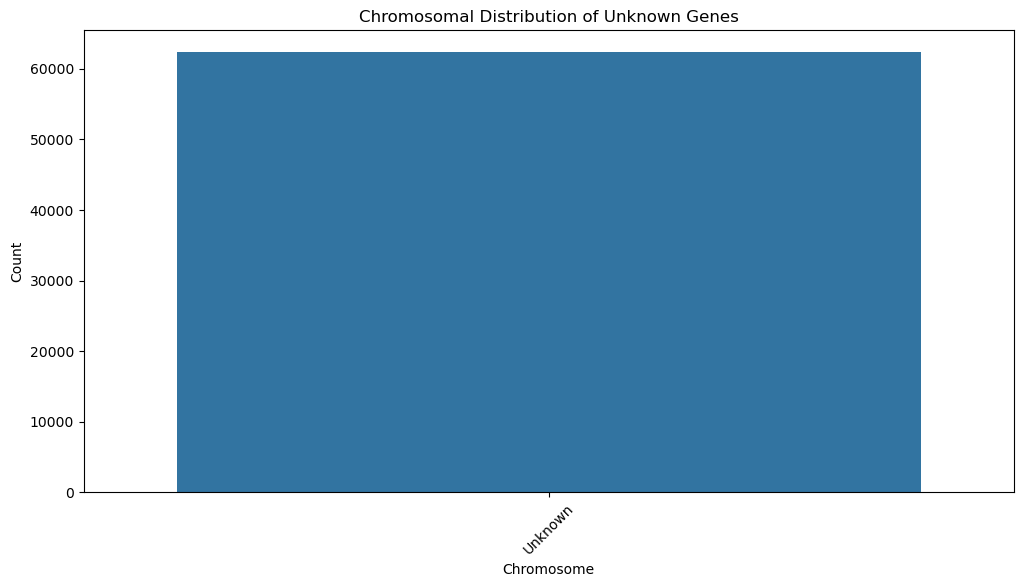

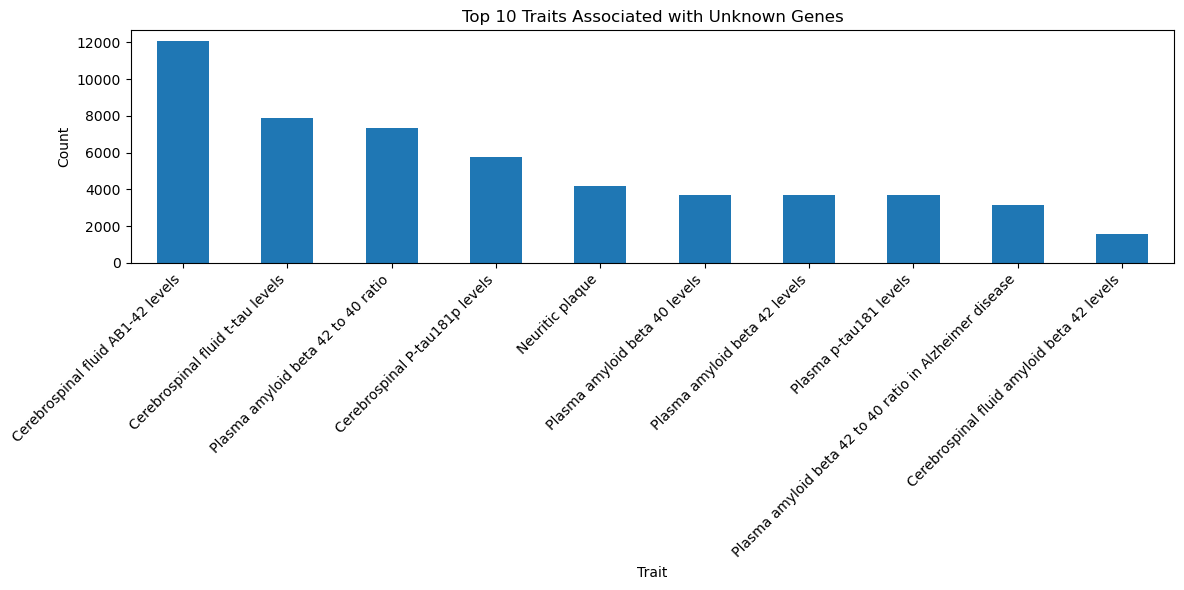

In [15]:
# Analyze unknown genes
unknown_data = df[df['MAPPED_GENE'] == 'Unknown']

print("\nAnalysis of Unknown Genes:")
print(f"Number of unknown gene entries: {len(unknown_data)}")
print(f"Average p-value: {unknown_data['P-VALUE'].mean():.2e}")
print(f"Minimum p-value: {unknown_data['P-VALUE'].min():.2e}")

# Top SNPs for unknown genes
top_unknown_snps = unknown_data.sort_values('P-VALUE').head(10)
print("\nTop 10 SNPs with unknown genes:")
print(top_unknown_snps[['SNPS', 'CHR_ID', 'CHR_POS', 'P-VALUE', 'OR or BETA', 'DISEASE/TRAIT']])

# Visualize chromosomal distribution of unknown genes
plt.figure(figsize=(12, 6))
sns.countplot(data=unknown_data, x='CHR_ID', order=sorted(unknown_data['CHR_ID'].unique()))
plt.title('Chromosomal Distribution of Unknown Genes')
plt.xlabel('Chromosome')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Analyze traits associated with unknown genes
unknown_traits = unknown_data['DISEASE/TRAIT'].value_counts().head(10)
plt.figure(figsize=(12, 6))
unknown_traits.plot(kind='bar')
plt.title('Top 10 Traits Associated with Unknown Genes')
plt.xlabel('Trait')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# This analysis will provide:

# For new genetic targets:

# Overview of each gene's associations
# P-value distributions
# Top associated traits
# Comparison between these new targets


# For unknown genes:

# Overall statistics
# Top SNPs with unknown gene associations
# Chromosomal distribution of unknown genes
# Top traits associated with unknown genes

## Chromosome 19 further analysis

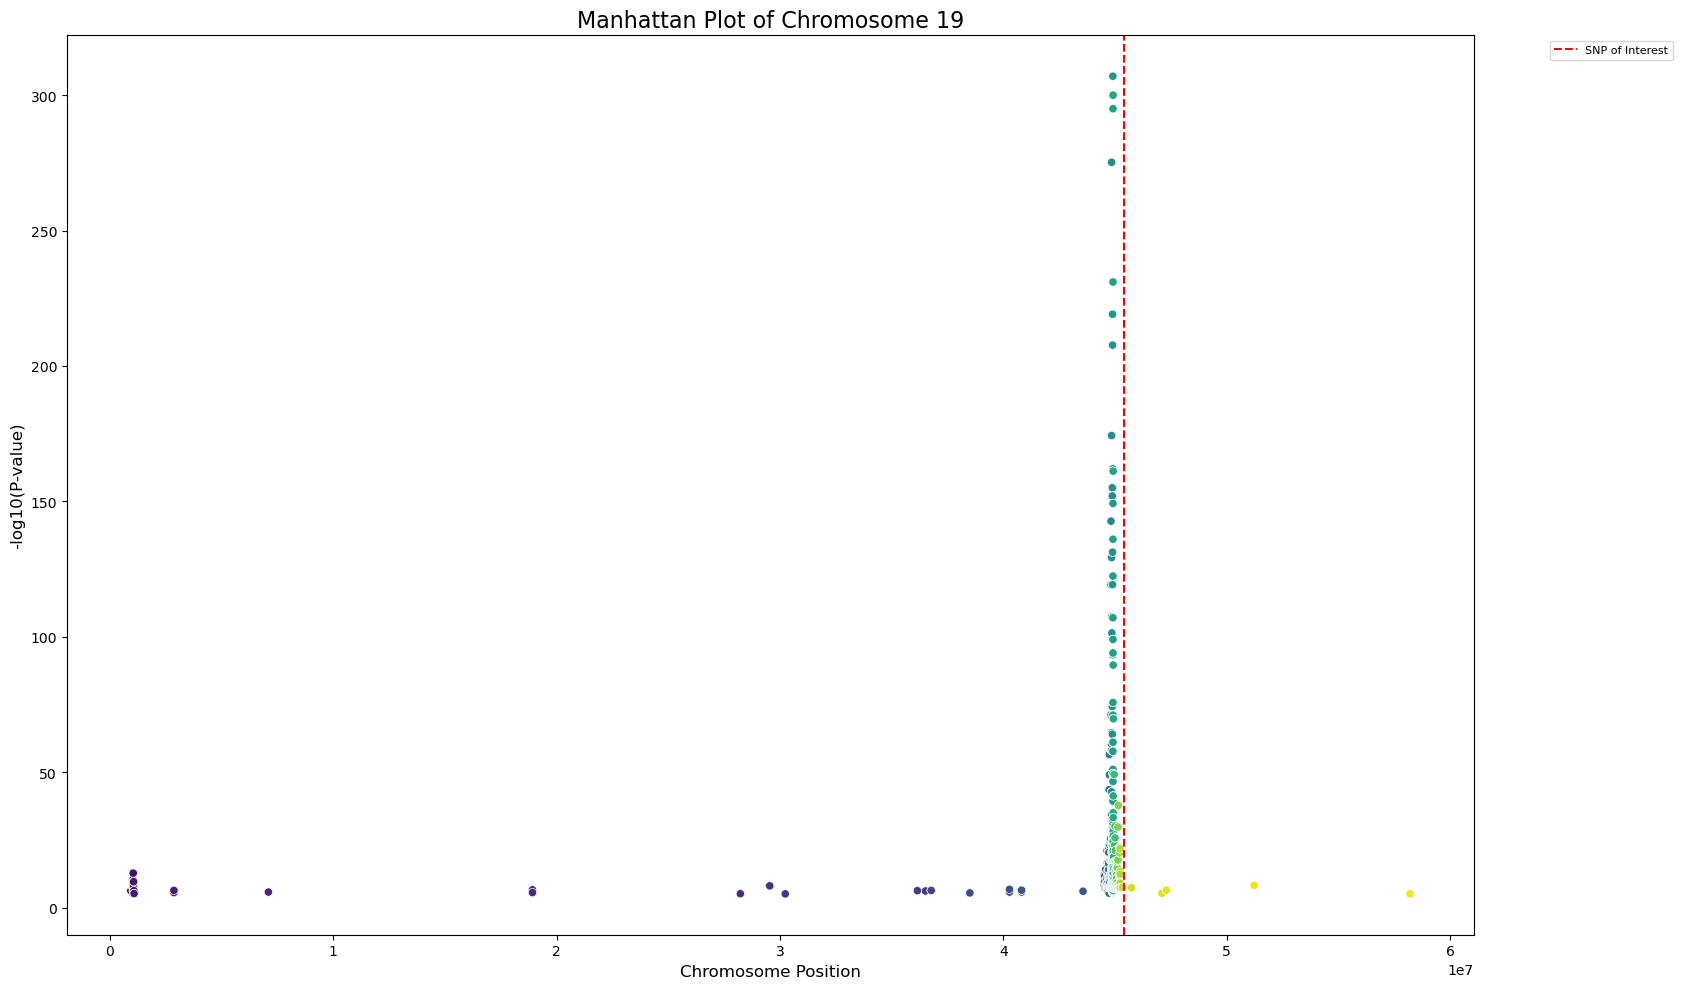

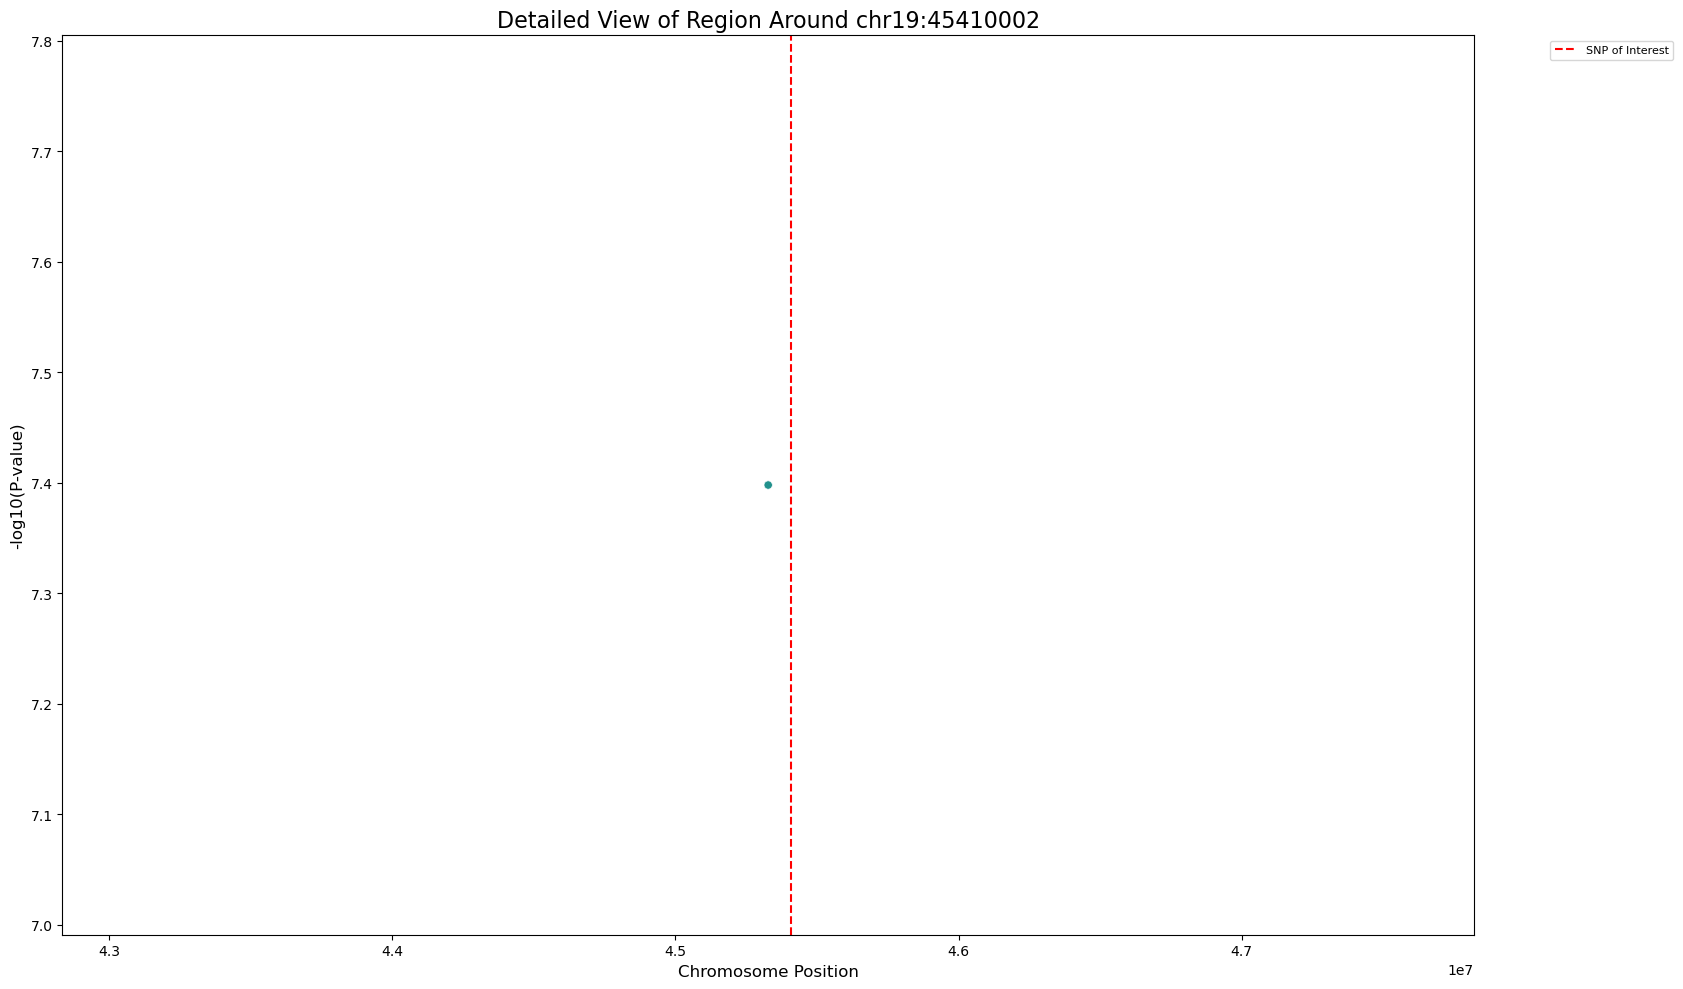

Genes in the region of interest:
['CKM - RPS16P9']

Top traits associated with this region:
DISEASE/TRAIT
Alzheimer's disease or family history of Alzheimer's disease    2
Name: count, dtype: int64


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for chromosome 19 data
chr19_data = df[df['CHR_ID'] == '19'].copy()

# Convert CHR_POS to numeric, errors='coerce' will turn non-numeric values to NaN
chr19_data['CHR_POS'] = pd.to_numeric(chr19_data['CHR_POS'], errors='coerce')

# Calculate -log10(P-VALUE), handling zero values
chr19_data['LOG_P'] = -np.log10(chr19_data['P-VALUE'].replace(0, 1e-300))

# Sort by position and reset index
chr19_data = chr19_data.sort_values('CHR_POS').reset_index(drop=True)

# Plot p-values along chromosome 19
plt.figure(figsize=(20, 10))  # Increased figure size
sns.scatterplot(data=chr19_data, x='CHR_POS', y='LOG_P', hue='MAPPED_GENE', palette='viridis', legend=False)
plt.title('Manhattan Plot of Chromosome 19', fontsize=16)
plt.xlabel('Chromosome Position', fontsize=12)
plt.ylabel('-log10(P-value)', fontsize=12)
plt.axvline(x=45410002, color='red', linestyle='--', label='SNP of Interest')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make room for legend
plt.show()

# Zoom in on the region of interest
region_of_interest = chr19_data[(chr19_data['CHR_POS'] >= 45300000) & (chr19_data['CHR_POS'] <= 45500000)]
plt.figure(figsize=(20, 10))  # Increased figure size
sns.scatterplot(data=region_of_interest, x='CHR_POS', y='LOG_P', hue='MAPPED_GENE', palette='viridis', legend=False)
plt.title('Detailed View of Region Around chr19:45410002', fontsize=16)
plt.xlabel('Chromosome Position', fontsize=12)
plt.ylabel('-log10(P-value)', fontsize=12)
plt.axvline(x=45410002, color='red', linestyle='--', label='SNP of Interest')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make room for legend
plt.show()

# Analyze nearby genes
nearby_genes = region_of_interest['MAPPED_GENE'].unique()
print("Genes in the region of interest:")
print(nearby_genes)

# Analyze traits associated with this region
traits = region_of_interest['DISEASE/TRAIT'].value_counts()
print("\nTop traits associated with this region:")
print(traits.head(10))

## Further Data Analysis of Alzheimers geneticts and key proteins involved


Top SNPs for APP:
            SNPS       P-VALUE  OR or BETA
18619  rs4817090  1.000000e-07    0.053091
61928  rs4817090  1.000000e-07    0.053091
61929  rs4817090  1.000000e-07    0.053091
61930  rs4817090  1.000000e-07    0.053091
61931  rs4817090  1.000000e-07    0.053091

Top SNPs for MAPT:
           SNPS        P-VALUE  OR or BETA
60305  rs242557  9.000000e-143        0.20
60306  rs242557  9.000000e-143        0.20
69654  rs242557  9.000000e-143        0.20
69655  rs242557  9.000000e-143        0.20
31820  rs242557   1.000000e-12        0.38

Top SNPs for PSEN1:
Empty DataFrame
Columns: [SNPS, P-VALUE, OR or BETA]
Index: []

Top SNPs for PSEN2:
Empty DataFrame
Columns: [SNPS, P-VALUE, OR or BETA]
Index: []

Top SNPs for APOE:
           SNPS        P-VALUE  OR or BETA
64353  rs429358   0.000000e+00    41.68000
10428  rs429358   0.000000e+00    41.68000
10427  rs429358   0.000000e+00    41.68000
64354  rs429358   0.000000e+00    41.68000
18653  rs429358  1.000000e-300     1.17924

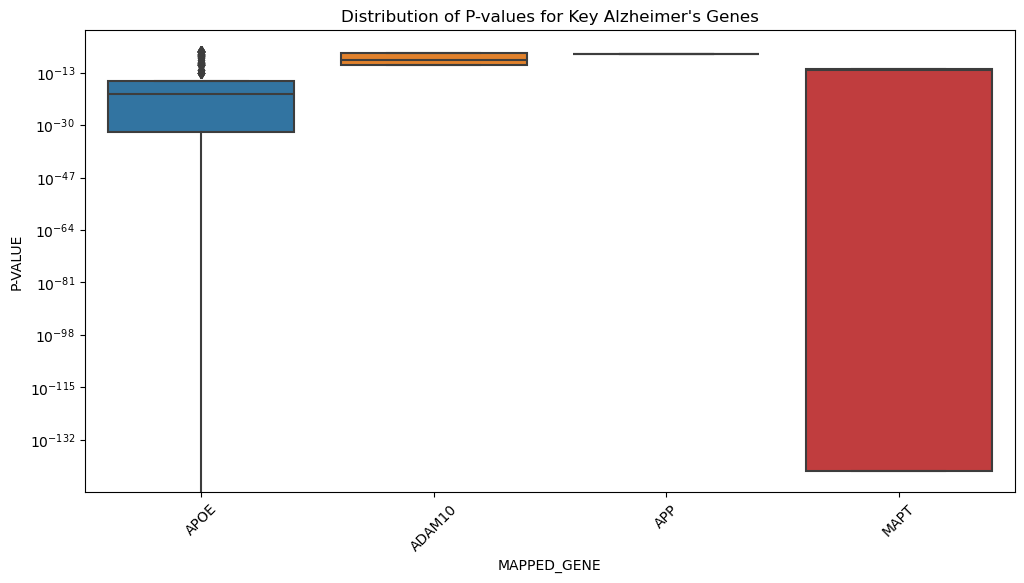

In [2]:
#Key genes and SNP's

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv(r'C:\Users\14807\OneDrive\Spreadsheets\Data Science Capstone\AI_ML_Biotech\Data Collection\Final Data Merging after Collection\merged_alzheimers_data.csv')

# List of key genes
key_genes = ['APP', 'MAPT', 'PSEN1', 'PSEN2', 'APOE', 'ADAM10', 'BACE1']

# Filter data for these genes
key_gene_data = df[df['MAPPED_GENE'].isin(key_genes)]

# Analyze SNPs for each gene
for gene in key_genes:
    gene_snps = key_gene_data[key_gene_data['MAPPED_GENE'] == gene]
    print(f"\nTop SNPs for {gene}:")
    print(gene_snps.sort_values('P-VALUE').head()[['SNPS', 'P-VALUE', 'OR or BETA']])

# Visualize p-values for these genes
plt.figure(figsize=(12, 6))
sns.boxplot(x='MAPPED_GENE', y='P-VALUE', data=key_gene_data)
plt.yscale('log')
plt.title('Distribution of P-values for Key Alzheimer\'s Genes')
plt.xticks(rotation=45)
plt.show()

In [3]:
# List of protein-related traits
protein_traits = ['amyloid', 'tau', 'protein levels', 'CSF']

# Filter data for protein-related traits
protein_data = df[df['DISEASE/TRAIT'].str.contains('|'.join(protein_traits), case=False)]

print("Top associations for protein-related traits:")
print(protein_data.sort_values('P-VALUE').head(10)[['MAPPED_GENE', 'SNPS', 'DISEASE/TRAIT', 'P-VALUE', 'OR or BETA']])

Top associations for protein-related traits:
      MAPPED_GENE      SNPS                               DISEASE/TRAIT  \
10428        APOE  rs429358  Cerebrospinal fluid amyloid beta 42 levels   
64353        APOE  rs429358  Cerebrospinal fluid amyloid beta 42 levels   
64354        APOE  rs429358  Cerebrospinal fluid amyloid beta 42 levels   
10427        APOE  rs429358  Cerebrospinal fluid amyloid beta 42 levels   
69655        MAPT  rs242557             Circulating levels of total-tau   
60306        MAPT  rs242557             Circulating levels of total-tau   
69654        MAPT  rs242557             Circulating levels of total-tau   
60305        MAPT  rs242557             Circulating levels of total-tau   
9588      NECTIN2    rs6857      Brain amyloid deposition (PET imaging)   
59737     NECTIN2    rs6857      Brain amyloid deposition (PET imaging)   

             P-VALUE  OR or BETA  
10428   0.000000e+00     41.6800  
64353   0.000000e+00     41.6800  
64354   0.000000e+00    

C:\Users\14807\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


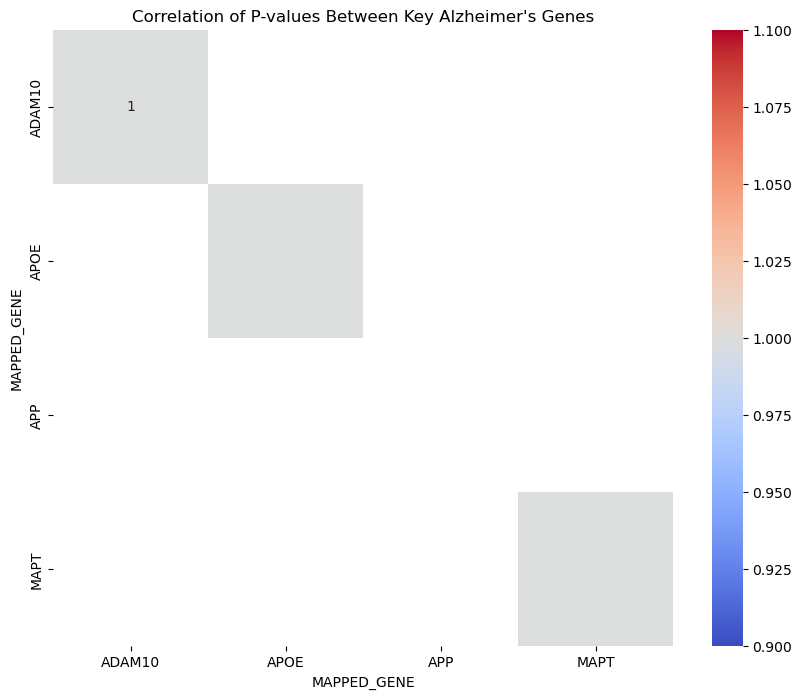

In [4]:
# Create a correlation matrix of p-values for key genes
gene_correlations = key_gene_data.pivot(columns='MAPPED_GENE', values='P-VALUE')
correlation_matrix = gene_correlations.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation of P-values Between Key Alzheimer\'s Genes')
plt.show()

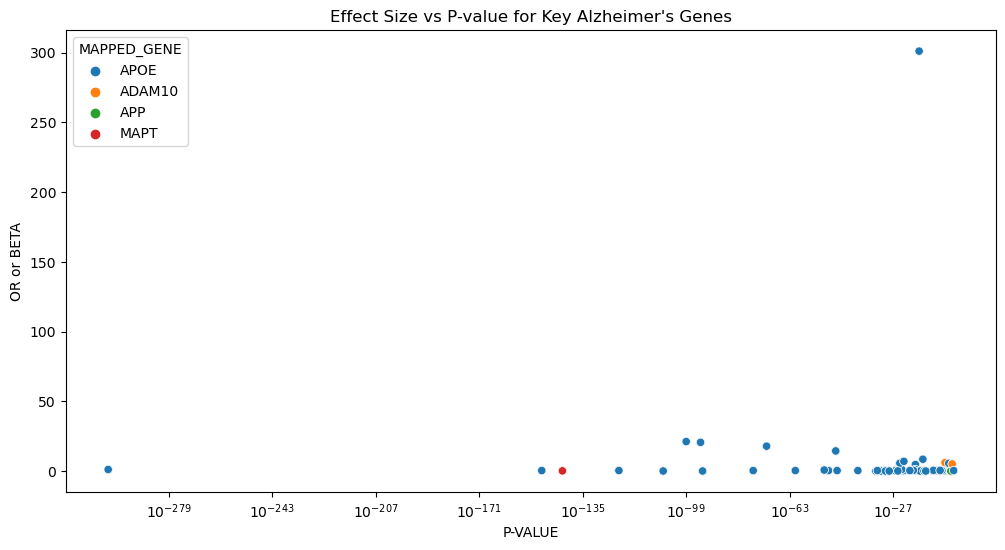

In [5]:
# Plot effect sizes for key genes
plt.figure(figsize=(12, 6))
sns.scatterplot(x='P-VALUE', y='OR or BETA', hue='MAPPED_GENE', data=key_gene_data)
plt.xscale('log')
plt.title('Effect Size vs P-value for Key Alzheimer\'s Genes')
plt.show()

C:\Users\14807\AppData\Local\Temp\ipykernel_19188\266604423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  key_gene_data['YEAR'] = pd.to_datetime(key_gene_data['DATE']).dt.year
C:\Users\14807\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\14807\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


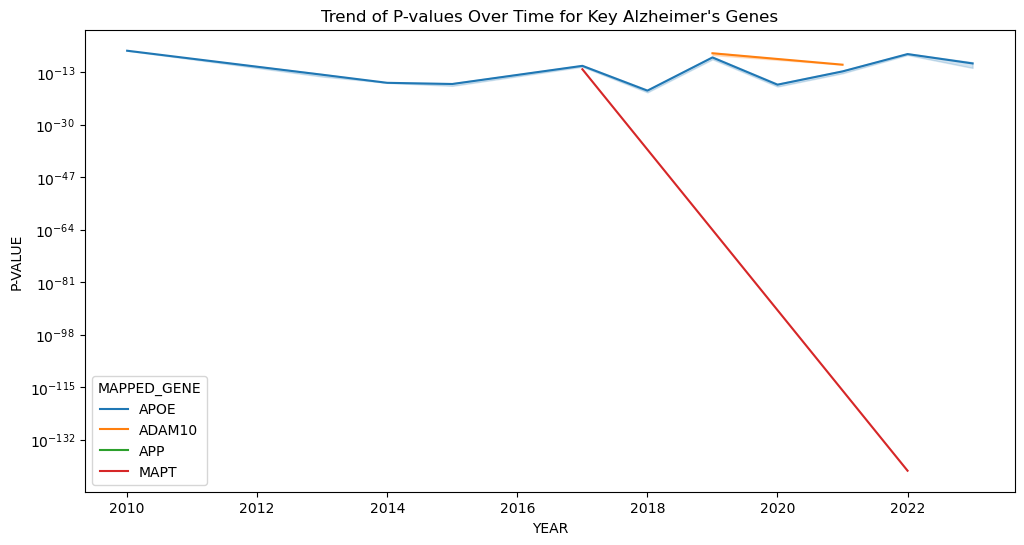

In [10]:
# Assuming there's a 'DATE' column in your dataset
key_gene_data['YEAR'] = pd.to_datetime(key_gene_data['DATE']).dt.year

plt.figure(figsize=(12, 6))
sns.lineplot(x='YEAR', y='P-VALUE', hue='MAPPED_GENE', data=key_gene_data)
plt.yscale('log')
plt.title('Trend of P-values Over Time for Key Alzheimer\'s Genes')
plt.show()

import warnings
# Apply the filter
warnings.filterwarnings("ignore", category=FutureWarning, module="pandas",)

              Pathway   Avg_P_Value
1         Tau Pathway  5.000000e-13
2    Lipid Metabolism  5.048556e-08
0     Amyloid Pathway  1.000000e-07
3  Protein Processing  1.003433e-07


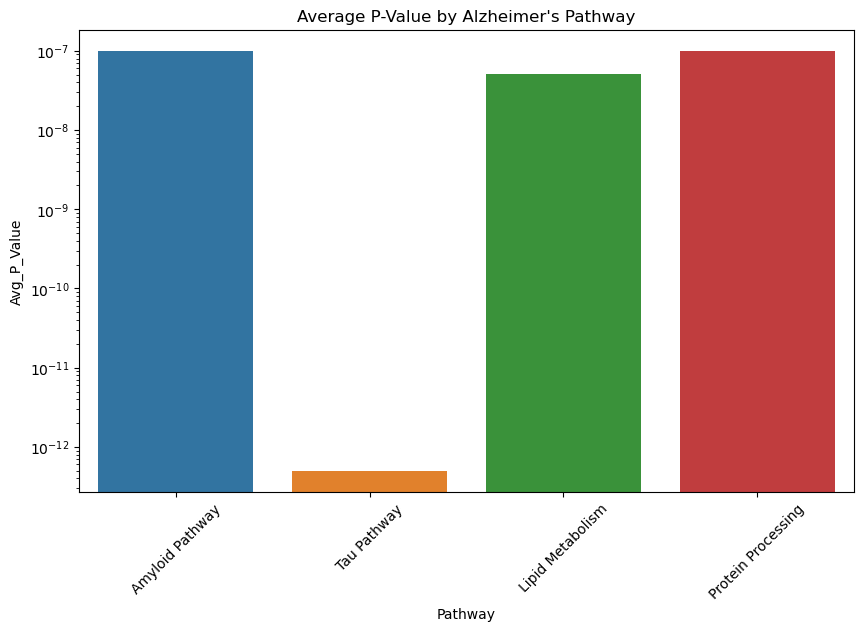

In [11]:
# Define pathways
pathways = {
    'Amyloid Pathway': ['APP', 'PSEN1', 'PSEN2', 'BACE1'],
    'Tau Pathway': ['MAPT'],
    'Lipid Metabolism': ['APOE'],
    'Protein Processing': ['ADAM10']
}

# Analyze average p-value for each pathway
pathway_summary = []
for pathway, genes in pathways.items():
    pathway_data = key_gene_data[key_gene_data['MAPPED_GENE'].isin(genes)]
    avg_p_value = pathway_data['P-VALUE'].mean()
    pathway_summary.append({'Pathway': pathway, 'Avg_P_Value': avg_p_value})

pathway_summary_df = pd.DataFrame(pathway_summary)
print(pathway_summary_df.sort_values('Avg_P_Value'))

# Visualize pathway analysis
plt.figure(figsize=(10, 6))
sns.barplot(x='Pathway', y='Avg_P_Value', data=pathway_summary_df)
plt.title('Average P-Value by Alzheimer\'s Pathway')
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()

In [13]:

#1. Strongest associations: Identify which SNPs and genes show the strongest associations with Alzheimer's and related traits.
#2  Protein-specific insights: Understand how genetic variations relate to specific protein levels or behaviors (amyloid, tau, etc.).
#3  Gene interactions: Detect potential interactions or correlations between key Alzheimer's genes.
#4 Effect sizes: Determine which genetic variations have the largest impact on Alzheimer's risk or related traits.
#5 Temporal trends: Observe how our understanding of these genetic associations has evolved over time.
#6 Pathway importance: Assess which biological pathways seem most significant in dataset.

# Network Analysis 

In [1]:
# a) Create nodes for genes, significant SNPs, and key traits.
# b) Establish edges based on statistical associations (p-values) and effect sizes.
# c) Visualize the network using tools like NetworkX in Python.

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv(r'C:\Users\14807\OneDrive\Spreadsheets\Data Science Capstone\AI_ML_Biotech\Data Collection\Final Data Merging after Collection\merged_alzheimers_data.csv')

# Filter for significant associations (you can adjust the threshold)
significant_data = df[df['P-VALUE'] < 0.05]

# Create a graph
G = nx.Graph()

def safe_log10(x):
    return -np.log10(max(x, 1e-300))  # Use a very small number instead of 0

# Add nodes and edges
for _, row in significant_data.iterrows():
    gene = row['MAPPED_GENE']
    snp = row['SNPS']
    trait = row['DISEASE/TRAIT']
    p_value = row['P-VALUE']
    
    # Add nodes
    G.add_node(gene, node_type='gene')
    G.add_node(snp, node_type='snp')
    G.add_node(trait, node_type='trait')
    
    # Add edges
    G.add_edge(gene, snp, weight=safe_log10(p_value))
    G.add_edge(snp, trait, weight=safe_log10(p_value))

print(f"Network created with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")

Network created with 6759 nodes and 7418 edges


In [6]:
# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Sort nodes by centrality
top_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:10]

print("Top 10 nodes by degree centrality:")
for node in top_nodes:
    print(f"{node}: {degree_centrality[node]:.4f}")

# Calculate clustering coefficient
clustering_coeff = nx.average_clustering(G)
print(f"\nAverage clustering coefficient: {clustering_coeff:.4f}")

# Identify connected components
connected_components = list(nx.connected_components(G))
print(f"\nNumber of connected components: {len(connected_components)}")
print(f"Largest component size: {len(max(connected_components, key=len))}")

Top 10 nodes by degree centrality:
Total PHF-tau (SNP x SNP interaction): 0.2344
Alzheimer's disease or family history of Alzheimer's disease: 0.0457
Diffuse plaques (SNP x SNP interaction): 0.0407
Cerebrospinal fluid sTREM-2 levels: 0.0303
Unknown: 0.0179
Total amyloid (SNP x SNP interaction): 0.0142
Neuritic plaques (SNP x SNP interaction): 0.0138
Family history of Alzheimer's disease: 0.0129
Cerebrospinal fluid AB1-42 levels: 0.0105
Monocyte chemoattractant protein-1 levels: 0.0104

Average clustering coefficient: 0.0000

Number of connected components: 28
Largest component size: 3140


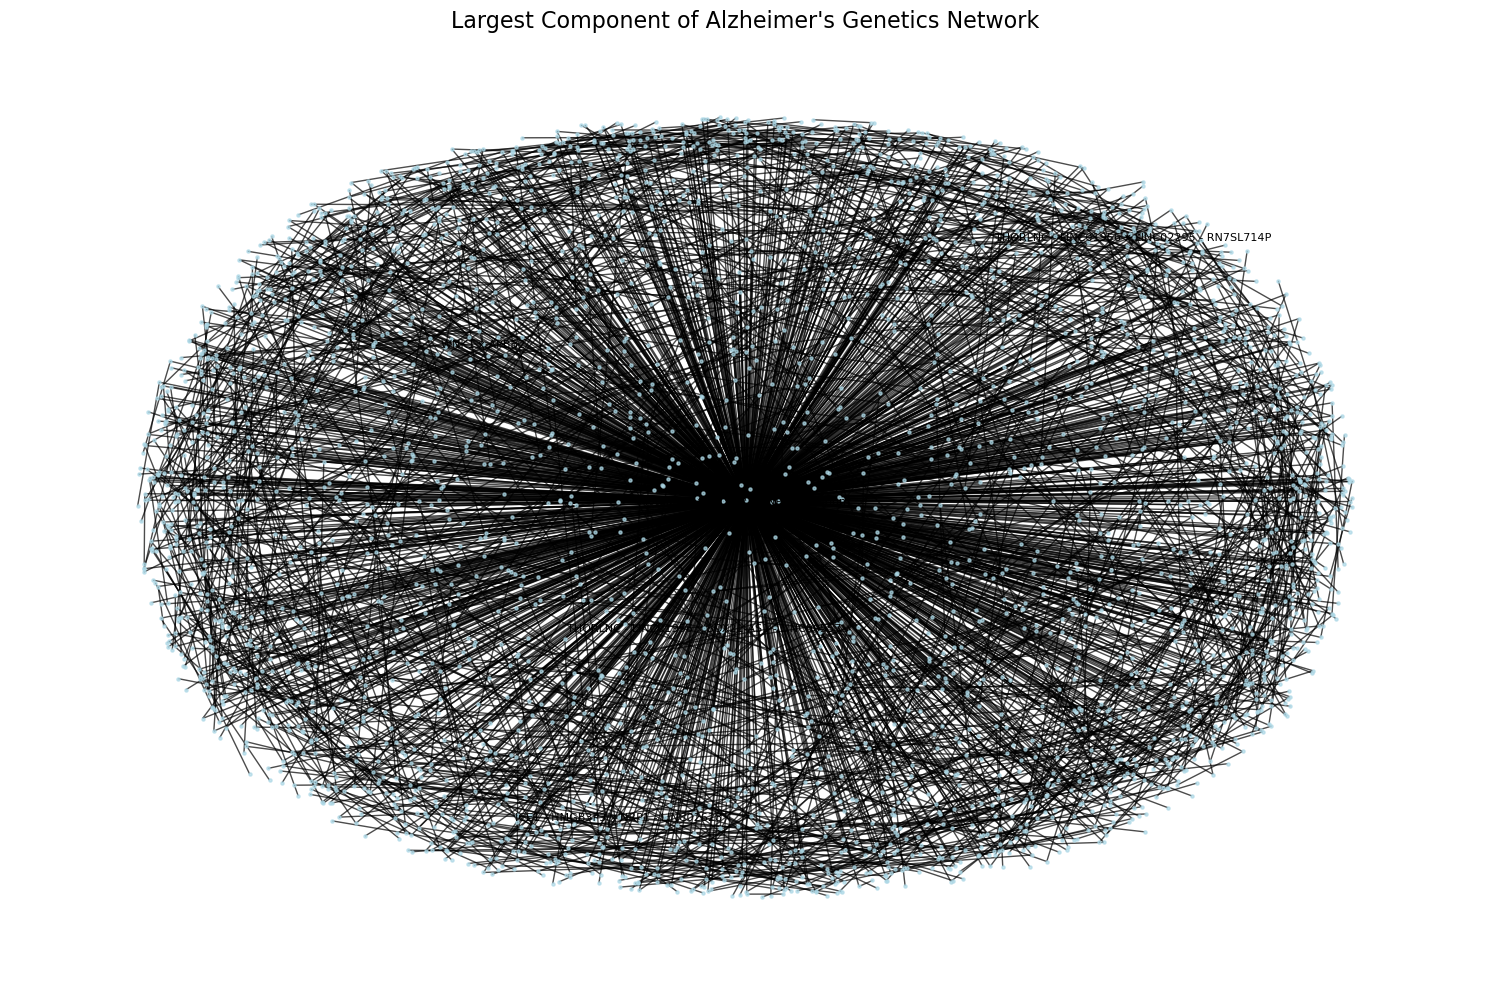

In [10]:
import matplotlib.pyplot as plt
import networkx as nx

# Get the largest connected component
largest_cc = max(nx.connected_components(G), key=len)
G_largest = G.subgraph(largest_cc)

# Compute centrality
centrality = nx.degree_centrality(G_largest)
top_nodes = sorted(centrality, key=centrality.get, reverse=True)[:5]

# Create a new figure with a specific size
fig, ax = plt.subplots(figsize=(15, 10))

# Compute layout
pos = nx.spring_layout(G_largest, k=0.5, iterations=50)

# Draw the network
nx.draw(G_largest, pos, ax=ax, node_size=5, node_color='lightblue', with_labels=False, alpha=0.7)

# Add labels for top nodes
nx.draw_networkx_labels(G_largest, pos, {node: node for node in top_nodes}, font_size=8, ax=ax)

# Set title
ax.set_title("Largest Component of Alzheimer's Genetics Network", fontsize=16)

# Turn off axis
ax.axis('off')

# Adjust the plot
plt.tight_layout()
plt.show()

In [11]:
node_types = nx.get_node_attributes(G_largest, 'node_type')
type_counts = pd.Series(node_types).value_counts()
print("Node type distribution in the largest component:")
print(type_counts)

Node type distribution in the largest component:
snp      1584
gene     1555
trait       1
Name: count, dtype: int64


In [12]:
for trait in top_nodes:
    if G_largest.nodes[trait].get('node_type') == 'trait':
        print(f"\nTop connections for {trait}:")
        connections = sorted(G_largest[trait], key=lambda x: G_largest[trait][x]['weight'], reverse=True)[:5]
        for conn in connections:
            print(f"{conn}: {G_largest[trait][conn]['weight']:.2f}")


Top connections for Total PHF-tau (SNP x SNP interaction):
rs4718976 x rs12194243: 25.70
rs4024044 x rs10092206: 25.40
rs608293 x rs8043215: 24.70
rs11082964 x rs2253753: 22.22
rs6025766 x rs1010234: 21.52


In [13]:
print(f"\nNetwork Metrics for Largest Component:")
print(f"Number of nodes: {G_largest.number_of_nodes()}")
print(f"Number of edges: {G_largest.number_of_edges()}")
print(f"Network density: {nx.density(G_largest):.6f}")
print(f"Average shortest path length: {nx.average_shortest_path_length(G_largest):.2f}")


Network Metrics for Largest Component:
Number of nodes: 3140
Number of edges: 3168
Network density: 0.000643
Average shortest path length: 2.99


# Alzheimers ML Model

In [9]:
print(df.columns)

Index(['DATE ADDED TO CATALOG', 'PUBMEDID', 'FIRST AUTHOR', 'DATE', 'JOURNAL',
       'LINK', 'STUDY', 'DISEASE/TRAIT', 'INITIAL SAMPLE SIZE',
       'REPLICATION SAMPLE SIZE', 'REGION', 'CHR_ID', 'CHR_POS',
       'REPORTED GENE(S)', 'MAPPED_GENE', 'UPSTREAM_GENE_ID',
       'DOWNSTREAM_GENE_ID', 'SNP_GENE_IDS', 'UPSTREAM_GENE_DISTANCE',
       'DOWNSTREAM_GENE_DISTANCE', 'STRONGEST SNP-RISK ALLELE', 'SNPS',
       'MERGED', 'SNP_ID_CURRENT', 'CONTEXT', 'INTERGENIC',
       'RISK ALLELE FREQUENCY', 'P-VALUE', 'PVALUE_MLOG', 'P-VALUE (TEXT)',
       'OR or BETA', '95% CI (TEXT)', 'PLATFORM [SNPS PASSING QC]', 'CNV',
       'MAPPED_TRAIT', 'MAPPED_TRAIT_URI', 'STUDY ACCESSION',
       'GENOTYPING TECHNOLOGY', 'Gene_Key', 'Entry', 'Reviewed', 'Entry Name',
       'Protein names', 'Gene Names', 'Organism', 'Length',
       'Involvement in disease', 'Sequence_y'],
      dtype='object')


In [10]:
print(df.head())

  DATE ADDED TO CATALOG  PUBMEDID FIRST AUTHOR       DATE JOURNAL  \
0             6/16/2016  26268530   Ramanan VK  8/11/2015   Brain   
1             6/16/2016  26268530   Ramanan VK  8/11/2015   Brain   
2             6/16/2016  26268530   Ramanan VK  8/11/2015   Brain   
3             6/16/2016  26268530   Ramanan VK  8/11/2015   Brain   
4             6/16/2016  26268530   Ramanan VK  8/11/2015   Brain   

                                   LINK  \
0  www.ncbi.nlm.nih.gov/pubmed/26268530   
1  www.ncbi.nlm.nih.gov/pubmed/26268530   
2  www.ncbi.nlm.nih.gov/pubmed/26268530   
3  www.ncbi.nlm.nih.gov/pubmed/26268530   
4  www.ncbi.nlm.nih.gov/pubmed/26268530   

                                               STUDY  \
0  GWAS of longitudinal amyloid accumulation on 1...   
1  GWAS of longitudinal amyloid accumulation on 1...   
2  GWAS of longitudinal amyloid accumulation on 1...   
3  GWAS of longitudinal amyloid accumulation on 1...   
4  GWAS of longitudinal amyloid accumulation o

In [11]:
snp_columns = [col for col in df.columns if 'rs' in col.lower()]
gene_columns = [col for col in df.columns if 'gene' in col.lower()]

print("Columns that might contain SNP information:")
print(snp_columns)
print("\nColumns that might contain gene information:")
print(gene_columns)

Columns that might contain SNP information:
['FIRST AUTHOR']

Columns that might contain gene information:
['REPORTED GENE(S)', 'MAPPED_GENE', 'UPSTREAM_GENE_ID', 'DOWNSTREAM_GENE_ID', 'SNP_GENE_IDS', 'UPSTREAM_GENE_DISTANCE', 'DOWNSTREAM_GENE_DISTANCE', 'Gene_Key', 'Gene Names']


In [12]:
# Select numeric columns for features
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Remove 'P-VALUE' and 'OR or BETA' from numeric columns if they exist
if 'P-VALUE' in numeric_columns:
    numeric_columns.remove('P-VALUE')
if 'OR or BETA' in numeric_columns:
    numeric_columns.remove('OR or BETA')

# Select features and target
X = df[numeric_columns + ['P-VALUE', 'OR or BETA']]
y = df['DISEASE/TRAIT'].str.contains('Alzheimer', case=False).astype(int)

# Handle missing values
imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data preparation completed.")
print(f"Training set shape: {X_train_scaled.shape}")
print(f"Testing set shape: {X_test_scaled.shape}")

Data preparation completed.
Training set shape: (55782, 10)
Testing set shape: (13946, 10)


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load your data
df = pd.read_csv(r'C:\Users\14807\OneDrive\Spreadsheets\Data Science Capstone\AI_ML_Biotech\Data Collection\Final Data Merging after Collection\merged_alzheimers_data.csv')

# Define features based on network analysis insights
top_snps = ['rs4718976', 'rs12194243', 'rs4024044', 'rs10092206', 'rs608293', 'rs8043215', 'rs11082964', 'rs2253753', 'rs6025766', 'rs1010234']
gene_features = ['APOE', 'MAPT', 'APP']  # Add other important genes from your network

# Select features and target
X = df[top_snps + gene_features + ['P-VALUE', 'OR or BETA']]
y = df['DISEASE/TRAIT'].str.contains('Alzheimer', case=False).astype(int)

# Handle missing values
imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data preparation completed.")
print(f"Training set shape: {X_train_scaled.shape}")
print(f"Testing set shape: {X_test_scaled.shape}")

KeyError: "['rs4718976', 'rs12194243', 'rs4024044', 'rs10092206', 'rs608293', 'rs8043215', 'rs11082964', 'rs2253753', 'rs6025766', 'rs1010234', 'APOE', 'MAPT', 'APP'] not in index"